# Wine Quality Prediction: Enhancing Wine Assessment through Machine Learning

## Introduction

Wine quality prediction plays a vital role in the winemaking industry, allowing producers to assess and improve the quality of their wines. By utilizing machine learning techniques, we aim to develop a predictive model that accurately evaluates the quality of wines based on their chemical properties and sensory attributes. This project aims to provide winemakers with a valuable tool to optimize their production processes and enhance customer satisfaction.

## Problem Statement  

The objective of this project is to develop a robust machine learning model that accurately predicts the quality of wines based on their chemical properties and sensory attributes. By leveraging the available data, including factors such as pH levels, alcohol content, volatile acidity, and sensory descriptors like aroma and taste, the model aims to provide winemakers with a reliable tool to assess and improve wine quality. Accurate wine quality prediction is crucial for optimizing production processes, ensuring consistency, and meeting consumer expectations, ultimately leading to enhanced customer satisfaction and market competitiveness.

Wine quality prediction holds immense importance for winemakers, playing a pivotal role in their pursuit of excellence. By leveraging advanced data science techniques, winemakers can gain valuable insights into the chemical properties and sensory attributes of wines. This knowledge enables them to make informed decisions at various stages of the production process, from grape selection to fermentation and aging. A reliable wine quality prediction model empowers winemakers to identify potential issues or deviations early on, allowing them to take proactive measures to maintain consistency and optimize the overall quality of their wines. Moreover, accurate predictions contribute to customer satisfaction by ensuring that the wines meet or exceed the expected sensory experience. This, in turn, enhances the reputation of winemakers, fosters brand loyalty, and promotes positive word-of-mouth recommendations, leading to increased market share and business growth.


# Approach
To tackle this problem, we will follow a systematic approach, encompassing the following steps:

## 1. Data Collection and Reading:
The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset), a reliable source known for providing comprehensive and accurate data. It consists of 1,599 observations of red wine samples sourced from the northern region of Portugal. The dataset comprises 12 physicochemical variables that were recorded. 
- Import required libraries.
- Acquire and load the dataset into the analysis environment.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, average_precision_score, precision_recall_curve, confusion_matrix, precision_recall_fscore_support
import warnings
from sklearn.exceptions import DataConversionWarning


In [2]:
# Load the wineQ.csv dataset
data = pd.read_csv('wineQ.csv')

# Define custom colors
colors = ['#799F37', '#41B3A3', '#F0E68C', '#D2B48C', '#87CEEB', '#FF9998FF']
color = ['#799F37', '#41B3A3', '#F0E68C', '#D2B48C']

# Create the colormap
cmap = mcolors.ListedColormap(colors)

# Set the plot style to whitegrid
sns.set_style('whitegrid')

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

## 2. Data Quality Analysis
Gaining insights into the dataset, identifying data quality issues, and performing necessary cleaning and preprocessing steps.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Data Preprocessing
   - Clean the data by deleting unwanted columns and handling missing values, outliers, or duplicates.

#### Delete unwanted columns

In [4]:
# Delete unwanted columns
data = data.drop(columns=['Id'])

# Display the modified DataFrame after dropping the 'Id' column
styled_data = data.head().style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})
styled_data

Unwanted columns are dropped using the drop() function, specifically the "id" column.

#### Missing Values

In [5]:

# Missing Values
null = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([null, percent], axis=1, keys=('Null', 'Percent'))

# Style the DataFrame for better visibility
styled_missing_data = missing_data.T.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

# Display the styled missing_data DataFrame
styled_missing_data


#### Duplicated Values

In [6]:
# Duplicated Values
duplicated_count = data.duplicated().sum()
duplicated_count

125

In [7]:
# drop duplicates 
data.drop_duplicates(inplace=True)


#### Unique Values 

In [8]:
# Unique Values 
unique_data = data.nunique()
unique_data

fixed acidity            91
volatile acidity        135
citric acid              77
residual sugar           80
chlorides               131
free sulfur dioxide      53
total sulfur dioxide    138
density                 388
pH                       87
sulphates                89
alcohol                  61
quality                   6
dtype: int64

In [9]:

# Create an empty DataFrame
unique_values_df = pd.DataFrame(columns=['Column', 'Unique Values'])

# Iterate over each column
for column in data.columns:
    unique_values = data[column].unique()
    column_df = pd.DataFrame({'Column': [column], 'Unique Values': [unique_values]})
    unique_values_df = pd.concat([unique_values_df, column_df], ignore_index=True)

# Display the DataFrame
unique_values_df.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

### Features Descriptions

1. `Fixed acidity` (tartaric acid -  𝑔/𝑑𝑚3 ):  most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. `Volatile acidity` (acetic acid -  𝑔/𝑑𝑚3 ): the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

3. `Citric acid` ( 𝑔/𝑑𝑚3 ): found in small quantities, citric acid can add ‘freshness’ and flavor to wines.

4. `Residual sugar` ( 𝑔/𝑑𝑚3 ): the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

5. `Chlorides` (sodium chloride -  𝑔/𝑑𝑚3 ): the amount of salt in the wine.

6. `Free sulfur dioxide` ( 𝑚𝑔/𝑑𝑚3 ): the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

7. `Total sulfur dioxide` ( 𝑚𝑔/𝑑𝑚3 ): amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

8. `Density` ( 𝑔/𝑐𝑚3 ): the density of water is close to that of water depending on the percent alcohol and sugar content.

9. `PH` : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

10. `Sulphates` (potassium sulphate -  𝑔/𝑑𝑚3 ): a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

11. `Alcohol` (% by volume): the percent alcohol content of the wine.

12. `Quality` : wine quality rating.



The project involved analyzing a DataFrame comprising 1143 entries and 13 columns, covering various chemical properties and sensory attributes related to wine quality. The dataset includes essential features such as 'fixed acidity,' 'volatile acidity,' 'citric acid,' and 'alcohol,' among others. It is notable that there are no missing values, ensuring data integrity and reliability for accurate analysis and modeling. The dataset contains 125 duplicated entries, which were eliminated, and the unnecessary "id" column was removed. The DataFrame consumes around 116.2 KB of memory, making it suitable for data science exploration. Additionally, it was observed that certain features, such as 'density,' have a considerable number of unique values, which could be relevant for further investigation. This comprehensive dataset provides a strong foundation for exploring relationships and patterns to predict wine quality effectively.

### Summary Statistics

In [10]:

# Display the summary statistics for numerical columns in the DataFrame
description = data.describe()

# Apply the same style to the summary statistics DataFrame
styled_description = description.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

# Display the styled summary statistics DataFrame
styled_description


The given data represents a dataset with 1143 samples of wine quality attributes. Each row corresponds to a wine sample, and the columns represent various features of the wine, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol content, and wine quality (target variable). The mean and standard deviation of each feature are provided, indicating the central tendency and spread of the data, respectively. The minimum and maximum values reveal the range within which each feature varies. For instance, fixed acidity ranges from 4.6 to 15.9, volatile acidity from 0.12 to 1.58, and so on. The dataset seems to have no missing values as all features have a count of 1143. Overall, this information provides an overview of the wine dataset, facilitating further analysis and modeling to predict the wine quality based on its attributes.

## 3. Exploratory Data analysis (EDA)
Exploration and Visualization 
- Target Variable: Quality


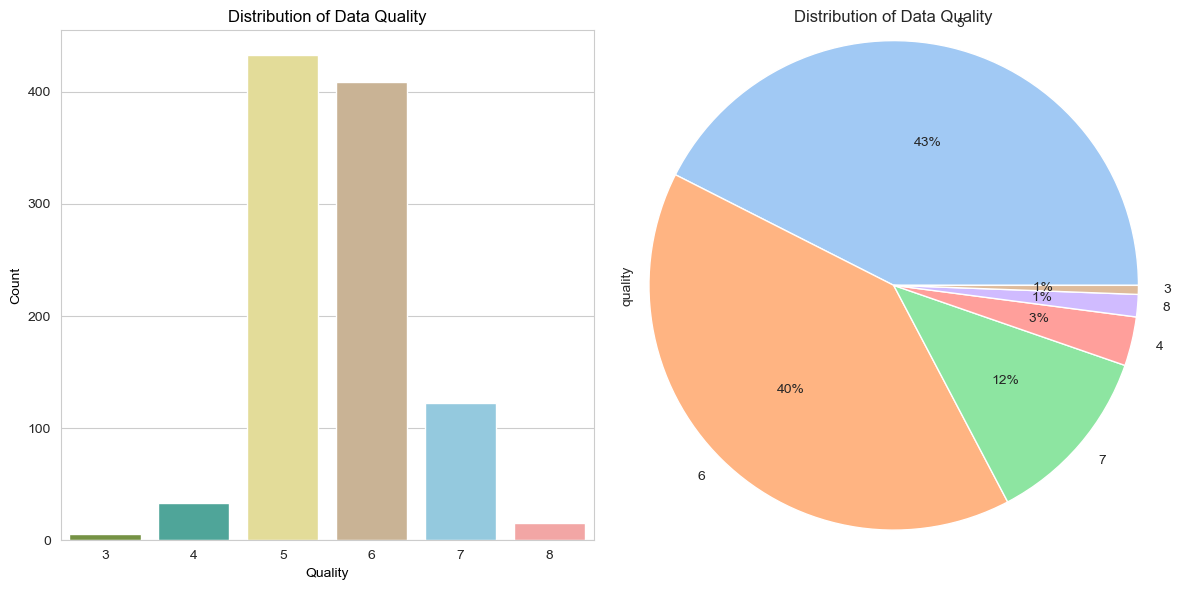

In [11]:
# Set the plot style to whitegrid
sns.set_style('whitegrid')

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Count plot for the distribution of 'data.quality'
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='quality', palette= colors)

plt.xlabel('Quality', color='black')
plt.ylabel('Count', color='black')
plt.title('Distribution of Data Quality', color='black')

# Subplot 2: Pie chart for the distribution of 'data.quality'
plt.subplot(1, 2, 2)
data.quality.value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.2, colors=sns.color_palette('pastel'))
plt.title('Distribution of Data Quality')

# Adjust layout for better visibility
plt.tight_layout()

# Display the plots
plt.show()

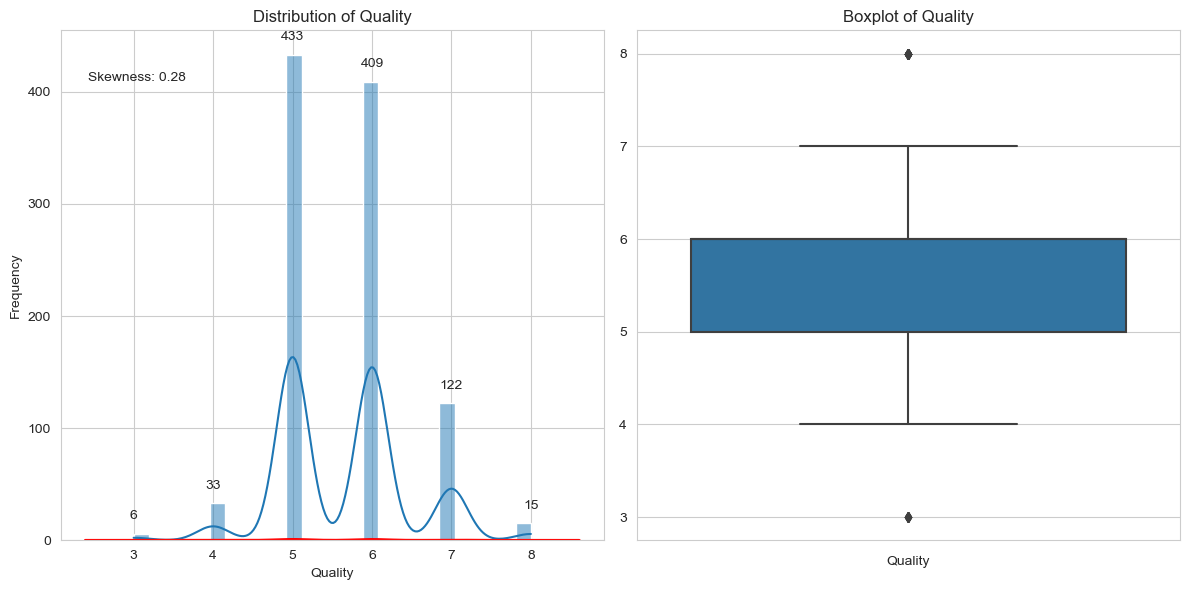

In [12]:

# Calculate descriptive statistics
quality_stats = data.quality.describe()

# Calculate skewness
skewness = data.quality.skew()

# Convert descriptive statistics to a DataFrame
quality_stats_df = quality_stats.to_frame().T

color2 = '#FF9998FF'

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.3)  # Add space between subplots

# Plot histogram on the left side without KDE line
sns.histplot(data=data, x='quality', kde=True, ax=axs[0])
axs[0].annotate(f"Skewness: {skewness:.2f}", xy=(0.05, 0.9), xycoords='axes fraction')

# Calculate value counts
value_counts = data['quality'].value_counts()

# Add value counts to the plot
for i, count in enumerate(value_counts):
    axs[0].text(value_counts.index[i], count + 10, str(count), ha='center', va='bottom')

# Plot KDE on the left side separately
sns.kdeplot(data=data, x='quality', ax=axs[0], color='red', linewidth=2)

axs[0].set_title('Distribution of Quality')
axs[0].set_xlabel('Quality')
axs[0].set_ylabel('Frequency')

# Plot boxplot on the right side
sns.boxplot(data=data, y='quality', ax=axs[1])
axs[1].set_title('Boxplot of Quality')
axs[1].set_xlabel('Quality')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Display the descriptive statistics DataFrame
quality_stats_df.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})


In [13]:
data.quality.isnull().sum()

0

In [14]:
# Create the 'rating' column based on quality ranges
data['rating'] = pd.cut(data['quality'], bins=[1, 4, 6, 10], labels=['bad', 'average', 'good'], include_lowest=True)

In [15]:
data.groupby('rating').mean().round(2).style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Upon examining the quality variable, it exhibits a slight positive skewness of 0.28, indicating a deviation from perfect symmetry in the distribution. Skewness measures the asymmetry of the data distribution, with a positive value indicating a longer or fatter tail on the right side of the distribution. This suggests that there is a slight bias towards higher quality ratings in the dataset.

The summary statistics for quality reveal valuable insights about the central tendency and dispersion of the data. The mean quality of 5.657043 represents the average quality rating of the red wines in the dataset. The standard deviation of 0.805824 provides a measure of how the quality ratings vary from the mean. A higher standard deviation suggests a wider spread of quality ratings, indicating more diversity among the wines. The minimum and maximum values of 3.0 and 8.0 represent the range of quality ratings observed in the dataset.

Furthermore, the quartiles of the quality variable provide information about the distribution of the data. The first quartile, or the 25th percentile, is the value below which 25% of the data falls. In this case, it is 5.0, indicating that a quarter of the wines have a quality rating below 5.0. The median, or the 50th percentile, represents the middle value of the data when it is sorted in ascending order. In our case, it is 6.0, meaning that half of the wines have a quality rating below 6.0. The third quartile, or the 75th percentile, is the value below which 75% of the data falls. It is also 6.0 in this dataset, indicating that three-quarters of the wines have a quality rating below 6.0.

These quartiles provide valuable information about the distribution and spread of the quality ratings, allowing us to better understand the range and variability of red wine quality in the dataset.

Additionally, another variable has been added to the dataset with the characteristic of categorizing the 'quality' variable into three categories: bad (1-4), average (5-6), and good (7-10), based on the specific quality ranges. This categorization enables us to further analyze and interpret the quality ratings of the red wines.

By examining the quality variable and incorporating this additional categorization, we gain insights into the distribution, range, and variability of red wine quality in the dataset. These insights are crucial for understanding and making informed decisions in the red wine industry.

#### Features Correlation With Target Variable

In [16]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a correlation dataframe with 'quality' column
correlation_df = pd.DataFrame(correlation_matrix['quality']).sort_values(by='quality', ascending=False)

# Drop the 'quality' column from the correlation dataframe
correlation_df = correlation_df.drop('quality')

# Display the correlation dataframe
correlation_df.T.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})


The correlation coefficients provide valuable insights into the relationship between each independent variable and the dependent variable, 'quality', in red wines. Analyzing the coefficients, we can draw the following conclusions:

There is a moderate positive correlation (0.485) between alcohol content and wine quality, suggesting that higher alcohol levels tend to be associated with better quality wines. Similarly, there is a weak positive correlation between sulphates (0.258) and wine quality, indicating that higher sulphate levels may slightly contribute to better quality wines.

Regarding specific characteristics, there is a weak positive correlation between citric acid (0.241) and wine quality, suggesting that wines with higher citric acid levels may have slightly higher quality. Similarly, fixed acidity (0.122) shows a weak positive correlation, indicating that higher levels of fixed acidity may be associated with slightly better quality wines.

On the other hand, residual sugar (0.022), pH (-0.052), free sulfur dioxide (-0.063), chlorides (-0.124), density (-0.175), and total sulfur dioxide (-0.183) exhibit very weak correlations or almost no relationship with wine quality. These variables have little impact on the overall quality of red wines.

The most significant negative correlation is observed between volatile acidity and wine quality (-0.407), indicating that as the volatile acidity increases, the quality of the wine tends to decrease. This suggests that higher levels of volatile acidity negatively impact the perceived quality of red wines.

These correlation coefficients provide valuable insights into the factors that influence the quality of red wines. By understanding the relationships between the independent variables and the dependent variable, we can gain a deeper understanding of the characteristics that contribute to the overall quality of red wines.

### Quality Types
**Deep exploration**

In [17]:
# Identify the unique quality types
quality_types = data['quality'].unique()

# Create an empty dictionary to store the dataframes
dfs = {}

# Iterate over quality types
for quality in quality_types:
    # Filter the data based on quality type
    filtered_data = data[data['quality'] == quality].copy()
    
    # Convert alcohol values to percentages
    filtered_data['alcohol'] = filtered_data['alcohol'] 
    
    # Add the dataframe to the dictionary with quality type as key
    dfs[quality] = filtered_data

# Access the dataframes for each quality type
df_quality_3 = dfs[3]
df_quality_4 = dfs[4]
df_quality_5 = dfs[5]
df_quality_6 = dfs[6]
df_quality_7 = dfs[7]
df_quality_8 = dfs[8]

# Define the characteristics to plot
characteristics = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'density', 'pH', 'sulphates', 'alcohol']

#### Quality 3 
**Values**

In [18]:
# Print the dataframes
print('Quality 3:')
df_quality_3.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Quality 3:


The data frame represents wines with a quality rating of 3. These wines exhibit characteristics that contribute to their quality rating. Among the variables, several show consistent trends. Higher values of fixed acidity tend to be associated with lower quality ratings. Similarly, higher volatile acidity and higher chloride levels also tend to be associated with lower quality ratings. On the other hand, higher levels of citric acid tend to be associated with higher quality ratings. 

For other variables such as residual sugar, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol, no clear trends are observed with respect to the quality rating in Quality 3. The values of these variables do not show a consistent pattern that directly correlates with the quality rating.

It is important to note that these observations provide an initial understanding of the relationships between the variables and the quality rating in Quality 3. Further analysis, including statistical tests, may be required to draw more robust conclusions and identify any significant associations between these variables and the quality of the wines in Quality 3.

##### Data Distribution

Density and Skewness

The red line represent the density for various characteristics. Density is a measure of how closely packed the molecules are within a substance. In this context, it likely refers to the density of a specific component or property being analyzed. 

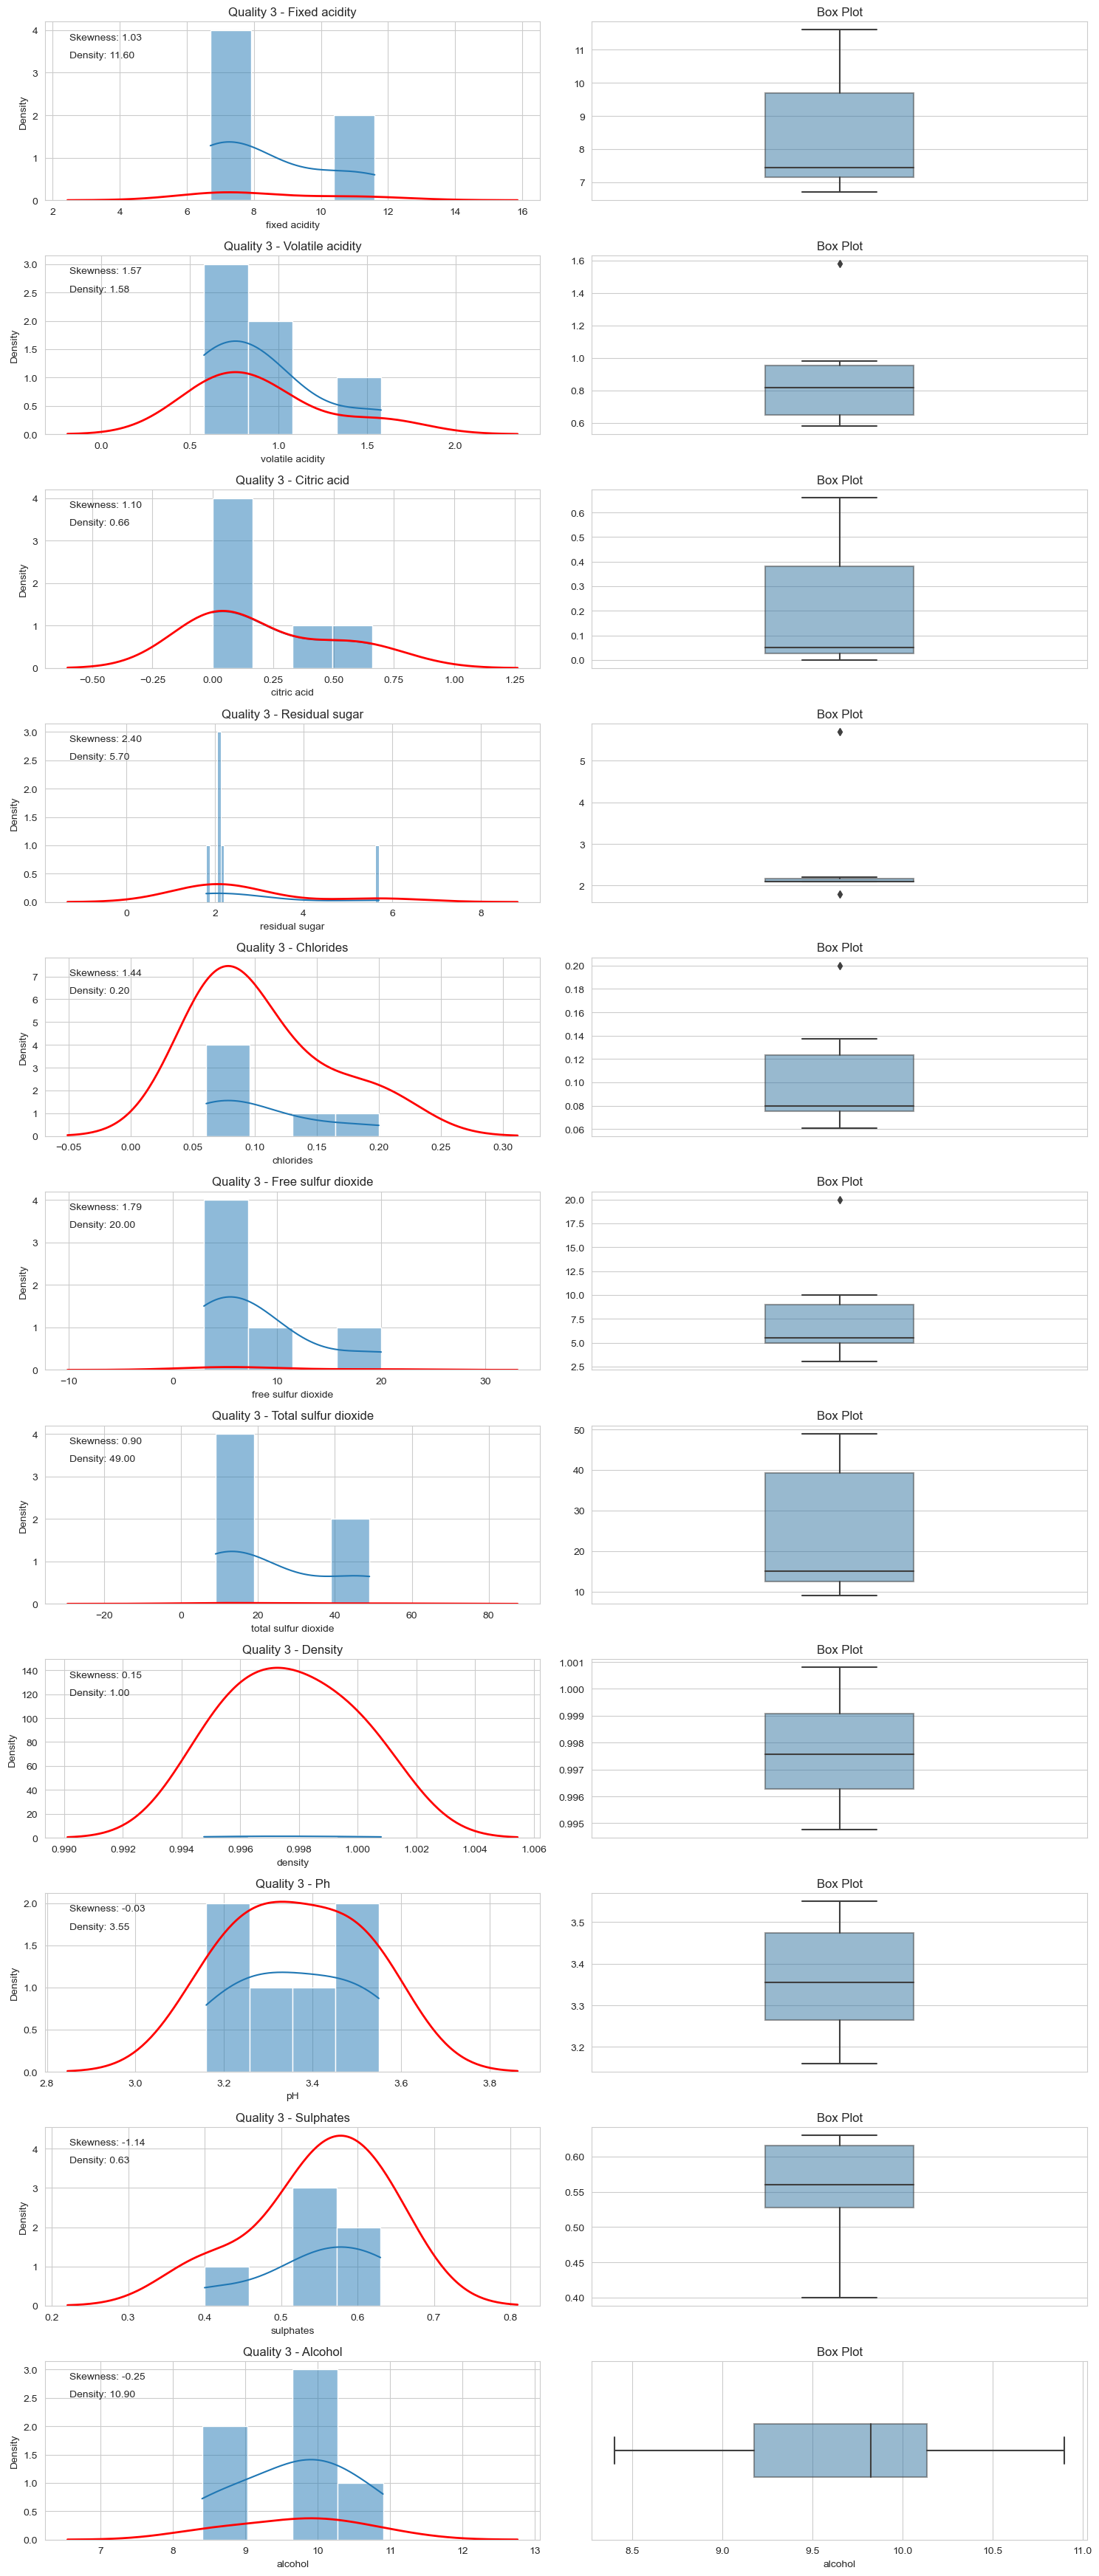

In [19]:

# Set up subplots
fig, axs = plt.subplots(11, 2, figsize=(15, 35))

# Loop through the characteristics and plot histograms and box plots
for i, characteristic in enumerate(characteristics):
    # Plot histogram
    ax_hist = axs[i, 0]
    ax_box = axs[i, 1]

    sns.histplot(data=df_quality_3, x=characteristic, kde=True, ax=ax_hist)
    sns.kdeplot(data=df_quality_3, x=characteristic, ax=ax_hist, color='red', linewidth=2)
    ax_hist.set_title(f'Quality 3 - {characteristic.capitalize()}')
    ax_hist.set_xlabel(characteristic)
    ax_hist.set_ylabel('Density')

    # Calculate skewness
    skewness = df_quality_3[characteristic].skew()
    
    # Plot box plot
    if characteristic == 'alcohol':
        sns.boxplot(data=df_quality_3, x=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5))
    else:
        sns.boxplot(data=df_quality_3, y=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5))
    ax_box.set_title('Box Plot')
    ax_box.set_ylabel('')

    # Calculate density values
    density_values = df_quality_3[characteristic]
    density_label = f'Density: {density_values.max():.2f}'

    # Add skewness and density as text to the plot
    ax_hist.text(0.05, 0.9, f'Skewness: {skewness:.2f}', transform=ax_hist.transAxes)
    ax_hist.text(0.05, 0.8, density_label, transform=ax_hist.transAxes)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The graphs includes density values and skewness values for various characteristics. Density represents the concentration or closely packed nature of particles or molecules within a substance. Analyzing the density values, we observe that each characteristic has its own density value. For instance, "fixed acidity" has a density of 11.60, indicating a relatively high concentration or closely packed particles. In contrast, "volatile acidity" has a density of 1.58, suggesting a lower concentration or more dispersed particles. "Citric acid" has a density of 0.66, similar to water, while "residual sugar" has a density of 5.70, indicating a higher concentration or more closely packed particles. Other characteristics like "chlorides," "free sulfur dioxide," and "total sulfur dioxide" exhibit different density values, indicating varying concentrations or arrangements of particles. Additionally, "pH" has an unusual density of 3.55, which may be an error or unconventional representation. "Sulphates" has a density of 0.63, indicating a relatively low concentration, while "alcohol" has a density of 10.90, suggesting a moderate concentration or closely packed alcohol molecules.

Moving on to skewness, it provides insights into the distribution of data for each characteristic. Skewness values measure the asymmetry of the distribution. Positive skewness indicates a longer right tail, while negative skewness indicates a longer left tail. Analyzing the skewness values, we can observe that each characteristic has a different skewness value. For example, "fixed acidity" has a skewness of 1.03, indicating a moderately long right tail and a higher occurrence of wines with higher levels of fixed acidity. "Volatile acidity" has a skewness of 1.57, suggesting a significantly long right tail and a larger proportion of wines with higher volatile acidity. Other characteristics like "citric acid," "residual sugar," and "chlorides" also display positive skewness, indicating varying degrees of longer right tails and higher occurrences of higher levels. On the other hand, "pH" demonstrates near symmetrical distribution with a skewness value close to 0. "Sulphates" exhibits negative skewness, indicating a longer left tail and a higher occurrence of wines with lower sulphate levels. "Alcohol" also shows negative skewness but with a smaller magnitude, indicating a nearly symmetrical distribution with a slightly longer left tail and a relatively balanced occurrence of wines with higher and lower alcohol content.

Analyzing density and skewness provides valuable insights into the concentration, distribution, and prevalence of different characteristics in the dataset. These insights can help identify trends, patterns, and potential relationships between the characteristics and the quality of wines.

##### Mean Values of Characteristics for Quality 3 Wines

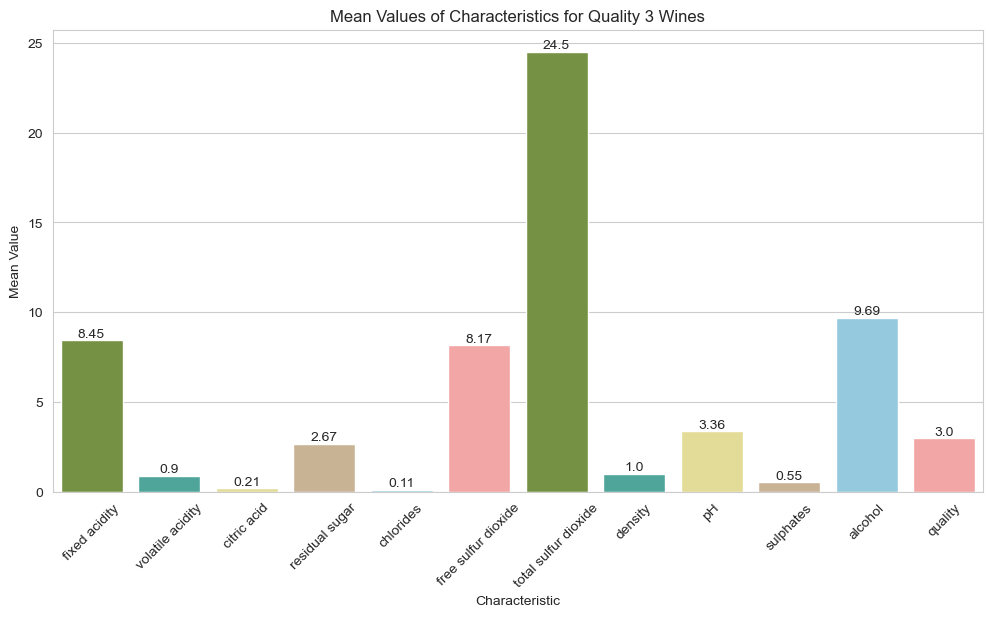

In [20]:
# Calculate the mean values for quality 3 wines
df_quality_3 = df_quality_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

mean_values = df_quality_3.mean().round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=mean_values.index, y=mean_values.values, palette=colors)
    
# Set labels and title
plt.xlabel('Characteristic')
plt.ylabel('Mean Value')
plt.title('Mean Values of Characteristics for Quality 3 Wines')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add mean values as labels to the bars
for i, mean in enumerate(mean_values.values):
    ax.text(i, mean, f'{mean}', ha='center', va='bottom')

# Show the plot
plt.show()


In Quality 3, the mean values of the variables provide insights into the average characteristics of the wines. Analyzing the mean values, we can observe the following:

The mean fixed acidity is 8.45, indicating a moderate level of fixed acidity in the wines. The average volatile acidity is 0.90, suggesting a relatively higher level of volatile acidity. In contrast, the mean citric acid is 0.21, indicating a relatively low level of citric acid content. For residual sugar, the mean value is 2.67, suggesting a moderate amount of residual sugar in the wines. The average level of chlorides is 0.11, indicating a relatively low presence of chlorides. The mean free sulfur dioxide is 8.17, representing a moderate level of free sulfur dioxide in the wines. The total sulfur dioxide has an average value of 24.50, indicating a moderate level overall. The mean density is 1.00, which is a standard value for density. The pH level of the wines has an average value of 3.36, suggesting a slightly acidic pH. Regarding sulphates, the mean value is 0.55, indicating a moderate level of sulphates in the wines. Finally, the mean alcohol content is 9.69, reflecting a lower alcohol percentage in the wines of Quality 3.

These mean values provide a general overview of the average characteristics of the wines in Quality 3. They can serve as reference points for comparison with other qualities or for further analysis to understand the specific attributes that contribute to the quality ratings in Quality 3.

#### Quality 4
##### Values

In [21]:

print('Quality 4:')
df_quality_4.T.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Quality 4:


The data frame represents wines with a quality rating of 4. These wines exhibit characteristics that contribute to their quality rating. In terms of acidity, quality 4 wines tend to have moderate levels of fixed acidity, with an average value of approximately 7.8 and a range from 4.6 to 12.5. Similarly, the volatile acidity in these wines is moderately present, with an average value of around 0.69 and a range from 0.35 to 1.09. The varying levels of citric acid in quality 4 wines, ranging from 0.0 to 1.0 with an average of approximately 0.14, contribute to the freshness and tartness of the wines. The residual sugar content in quality 4 wines is moderate, with an average value of about 2.5 and a range from 1.3 to 6.3. This suggests a moderate level of perceived sweetness. The chlorides content, with an average value of around 0.083 and a range from 0.045 to 0.610, impacts the perceived saltiness and overall balance of the wines. In terms of sulfur dioxide, quality 4 wines exhibit varying levels of both free and total sulfur dioxide. Free sulfur dioxide levels range from 3.0 to 41.0, with an average of about 13.0, while total sulfur dioxide levels range from 7.0 to 119.0, with an average of approximately 36.0. These levels contribute to the wine's stability and aging potential.
The density of quality 4 wines ranges from 0.9934 to 1.001, with an average value of around 0.9964. Density is an indicator of the wine's body, providing insights into its mouthfeel and richness. The pH values in quality 4 wines range from 2.74 to 3.9, with an average of about 3.38, influencing the wine's acidity level, balance, and stability. Sulphates content in quality 4 wines ranges from 0.33 to 2.0, with an average value of approximately 0.62. Sulphates act as a preservative and can impact the wine's aroma and aging potential. Finally, quality 4 wines exhibit varying levels of alcohol, ranging from 900.0 to 1310.0, with an average content of around 1010.0. Alcohol contributes to the body, texture, and perceived warmth of the wines.

These patterns provide valuable insights into the typical characteristics and composition of wines with quality 4. Further analysis and comparisons with wines of other quality types can reveal more detailed relationships and enhance our understanding of wine quality.

**Data Distribution**      
Density and Skewness        
The red line represent the density for various characteristics. The density values range from 0.9934 to 0.9996. Density is a measure of how closely packed the molecules are within a substance. In this context, it likely refers to the density of a specific component or property being analyzed. The data suggests that the density values are relatively close to each other, with slight variations. The average density appears to be around 0.996, with some values slightly lower or higher. The minimum density recorded is 0.9934, while the maximum density is 0.9996.

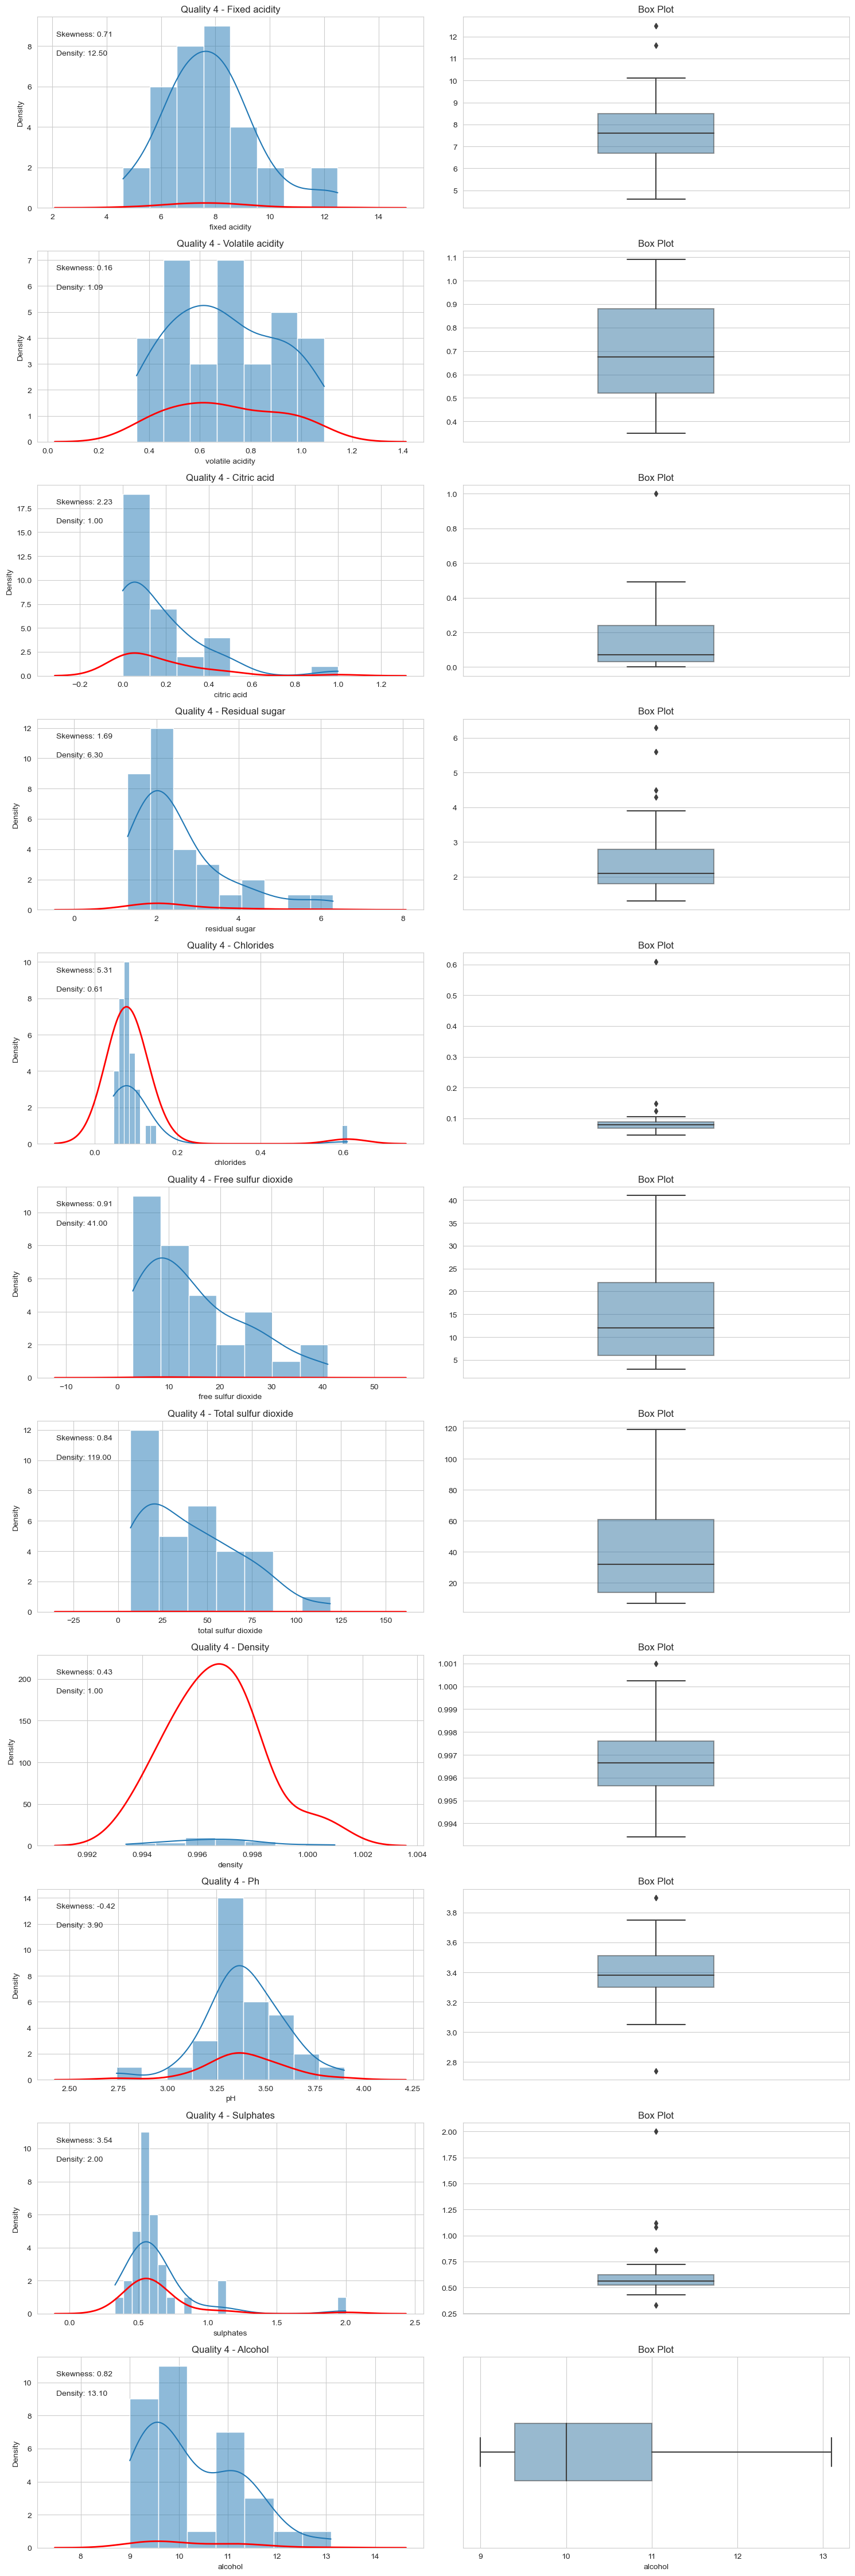

In [22]:

# Set up subplots
fig, axs = plt.subplots(11, 2, figsize=(15, 45))

# Loop through the characteristics and plot histograms and box plots
for i, characteristic in enumerate(characteristics):
    # Plot histogram
    ax_hist = axs[i, 0]
    ax_box = axs[i, 1]

    sns.histplot(data=df_quality_4, x=characteristic, kde=True, ax=ax_hist)
    sns.kdeplot(data=df_quality_4, x=characteristic, ax=ax_hist, color='red', linewidth=2)
    ax_hist.set_title(f'Quality 4 - {characteristic.capitalize()}')
    ax_hist.set_xlabel(characteristic)
    ax_hist.set_ylabel('Density')

    # Calculate skewness
    skewness = df_quality_4[characteristic].skew()

    # Plot box plot
    if characteristic == 'alcohol':
        sns.boxplot(data=df_quality_4, x=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5))
    else:
        sns.boxplot(data=df_quality_4, y=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5))
    ax_box.set_title('Box Plot')
    ax_box.set_ylabel('')

    # Calculate density values
    density_values = df_quality_4[characteristic]
    density_label = f'Density: {density_values.max():.2f}'

    # Add skewness and density as text to the plot
    ax_hist.text(0.05, 0.9, f'Skewness: {skewness:.2f}', transform=ax_hist.transAxes)
    ax_hist.text(0.05, 0.8, density_label, transform=ax_hist.transAxes)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Analyzing the above charts,each characteristic has its own density value, providing insights into the composition or concentration of substances. For example, "fixed acidity" has a density of 12.50, indicating a high concentration or closely packed particles. In contrast, "volatile acidity" has a density of 1.09, suggesting a relatively lower concentration or more dispersed particles. "Citric acid" has a density of 1.0, similar to water, while "residual sugar" has a density of 6.30, indicating a higher concentration. "Chlorides" have a density of 0.61, indicating a lower concentration compared to other characteristics. "Free sulfur dioxide" and "total sulfur dioxide" have densities of 41.00 and 119.00, respectively, indicating higher concentrations of sulfur dioxide particles. The "pH" value of -0.42 is unconventional and may be an error. "Sulphates" have a density of 3.54, indicating a relatively high concentration. "Alcohol" has a density of 13.10, suggesting a higher concentration or more closely packed alcohol molecules. Understanding density can help determine behavior, interactions, and physical properties in fields like chemistry, physics, and material science.

Additionally, analyzing the skewness of the quality 4 wines' characteristics provides further insights. "Fixed acidity" exhibits a moderate positive skew, indicating a longer right tail and more wines with higher levels. "Volatile acidity" has a slight positive skew, suggesting a slightly higher occurrence of wines with higher volatile acidity. "Citric acid" shows high positive skewness, indicating a significantly larger proportion of wines with higher citric acid levels. "Residual sugar" and "chlorides" demonstrate positive skewness, with longer right tails and higher prevalence of wines with higher content. "Free sulfur dioxide" and "total sulfur dioxide" display moderate positive skewness. "Density" exhibits slight positive skewness, while "pH" has negative skewness. "Sulphates" show strong positive skewness, and "alcohol" has moderate positive skewness. The quality ratings exhibit a symmetrical distribution with no significant skewness. Understanding the skewness of these characteristics helps identify trends and patterns in the composition of quality 4 wines.

##### Mean Values of Characteristics for Quality 4 Wines

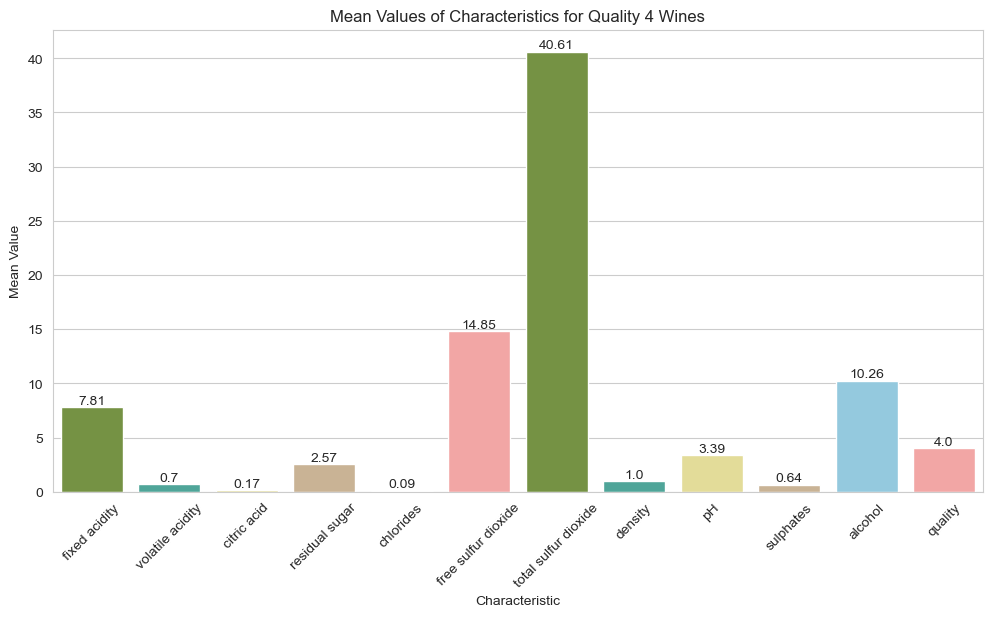

In [23]:
# Calculate the mean values for quality 3 wines
df_quality_4 = df_quality_4[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

# Calculate the mean values for quality 4 wines
mean_values = df_quality_4.mean().round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=mean_values.index, y=mean_values.values, palette=colors)
    
# Set labels and title
plt.xlabel('Characteristic')
plt.ylabel('Mean Value')
plt.title('Mean Values of Characteristics for Quality 4 Wines')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add mean values as labels to the bars
for i, mean in enumerate(mean_values.values):
    ax.text(i, mean, f'{mean}', ha='center', va='bottom')

# Show the plot
plt.show()


The mean values of quality 4 wines was analyzed to gain insights into various characteristics. The average fixed acidity was found to be 7.81, representing the overall concentration of acids in the wine. Volatile acidity, which contributes to the wine's pungent aroma, had an average value of 0.70. Citric acid, responsible for adding freshness and citrus flavors, averaged at 0.17. The residual sugar content, indicating the amount of sugar remaining after fermentation, was observed to be 2.57. Chlorides, affecting the wine's saltiness, were found to have an average value of 0.09. Free sulfur dioxide, an antioxidant and preservative, averaged at 14.85, while total sulfur dioxide, another preservation measure, had an average value of 40.61. The density of the wines was approximately 1.00, while the pH, reflecting acidity or alkalinity, averaged at 3.39. Sulphates, contributing to preservation and aroma, were found to have an average value of 0.64. Lastly, the alcohol content, a crucial factor influencing flavor and body, averaged at 10.26%. These detailed insights provide a comprehensive understanding of the chemical composition and characteristics of quality 4 wines, enabling informed analysis and decision-making within the wine industry.

#### Quality 5
##### Values

In [24]:
df_quality_5.T.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Upon analyzing wines with a quality rating of 5, several distinct patterns emerge in their characteristics, providing valuable insights into their composition and potential flavor profiles. These wines exhibit a moderate range of fixed acidity, typically falling within 6.6 to 8.8, influencing their tartness and overall balance. Additionally, they showcase a moderate range of volatile acidity, from 0.36 to 0.76, with proper control necessary to maintain stability and avoid off-flavors. Citric acid content varies from 0.0 to 0.79, contributing to a fresh and citrusy taste. Most wines in this category have residual sugar levels between 1.7 and 2.6, offering a moderate level of perceived sweetness. Chloride content ranges from 0.07 to 0.102, impacting the wine's balance and saltiness. Free sulfur dioxide levels range from 5.0 to 16.0, crucial for stability and protection from undesirable reactions. Total sulfur dioxide content falls between 23.0 and 42.0, essential for aging potential. Density values vary from 0.9937 to 1.0018, providing insights into body and mouthfeel. pH levels range from 2.99 to 3.67, affecting acidity, balance, and stability. Sulphate content ranges from 0.39 to 1.56, acting as a preservative. Alcohol levels range from 9.0 to 13.5, impacting body and warmth. Understanding these patterns allows winemakers and enthusiasts to grasp the distinctive qualities of wines with a quality rating of 5, aiding in informed decision-making for production and selection. Further analysis and comparisons with wines of different quality ratings can enhance our understanding of wine quality as a whole.

##### Data Distribution
Density and Skewness

Density is a measure of how closely packed the molecules are within a substance. In this context, it likely refers to the density of a specific component or property being analyzed. 
*The red line represent the density for various characteristics.*

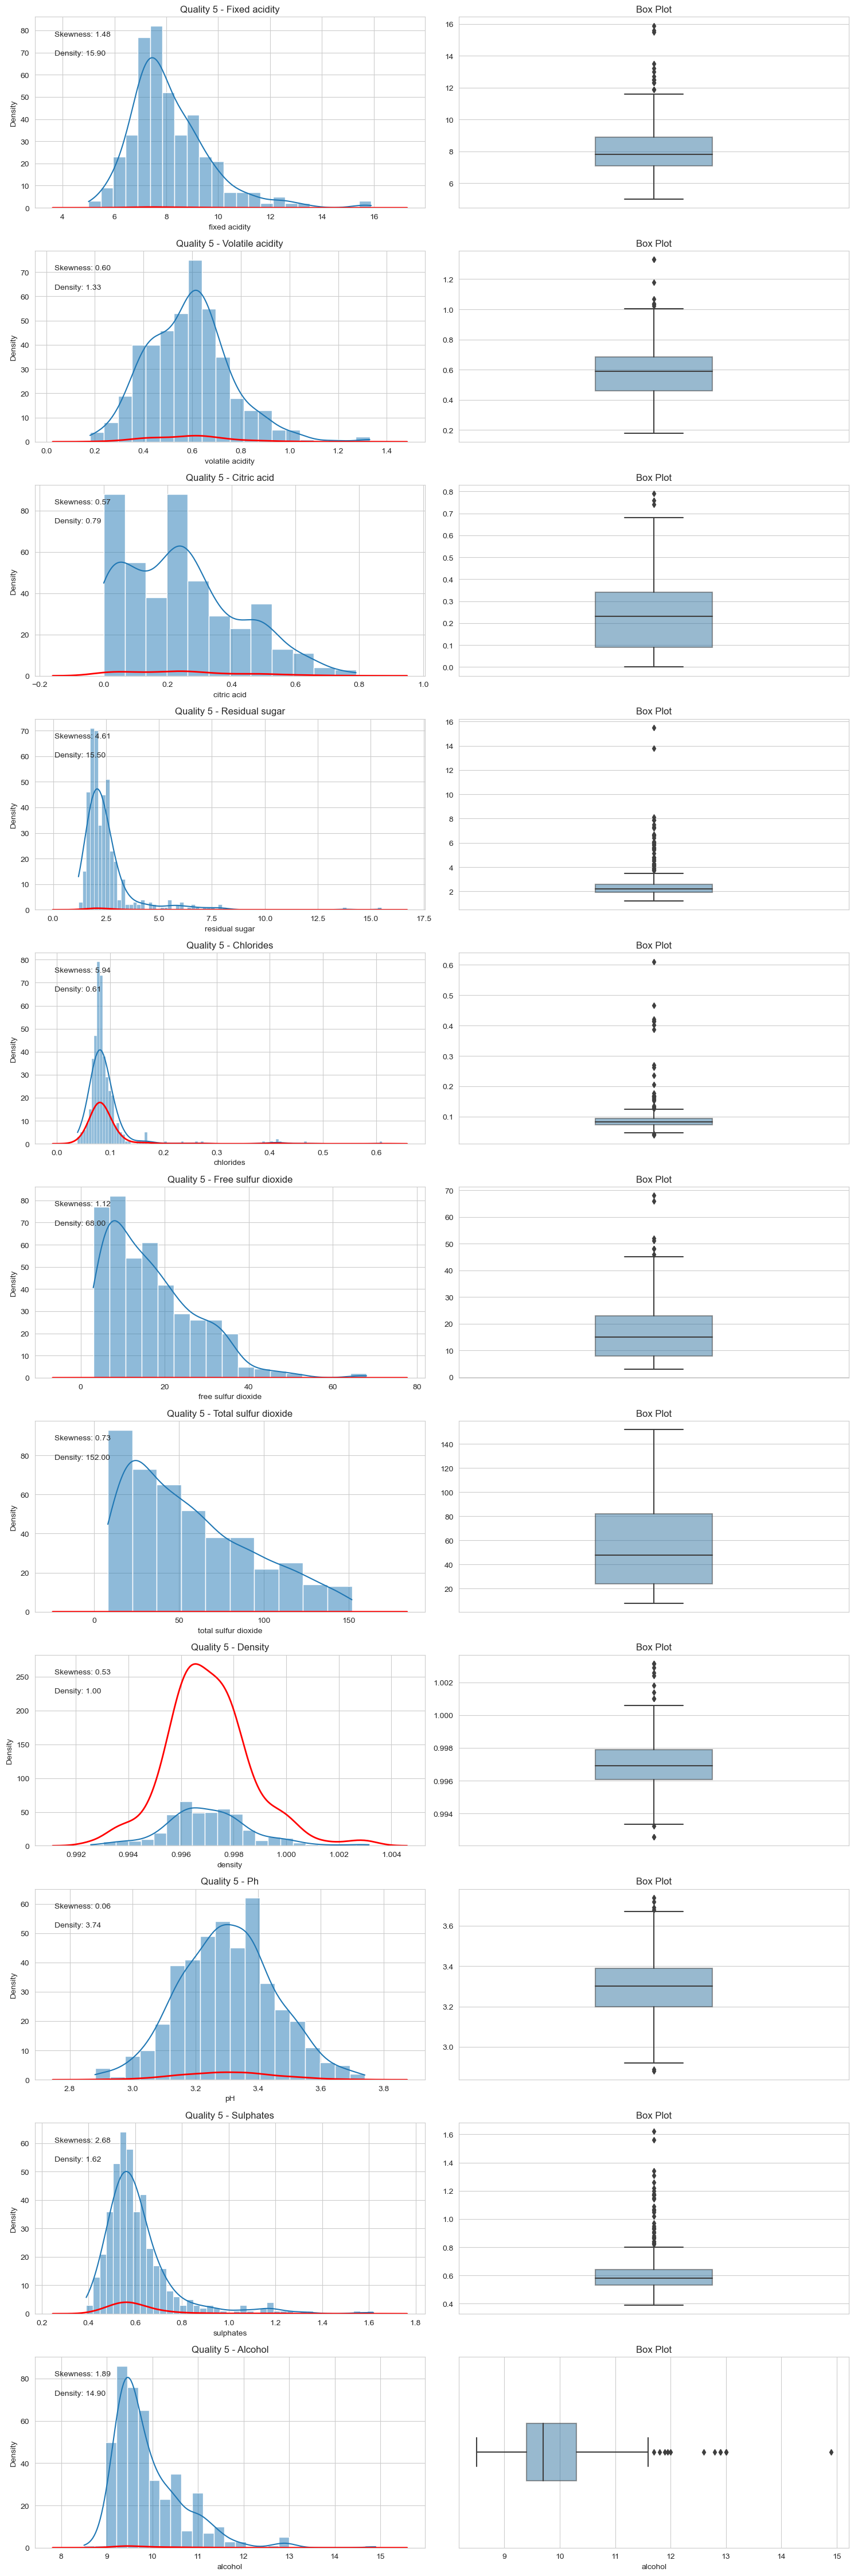

In [25]:
# Set up subplots
fig, axs = plt.subplots(11, 2, figsize=(15, 45))

# Loop through the characteristics and plot histograms and box plots
for i, characteristic in enumerate(characteristics):
    # Plot histogram
    ax_hist = axs[i, 0]
    ax_box = axs[i, 1]

    sns.histplot(data=df_quality_5, x=characteristic, kde=True, ax=ax_hist)
    sns.kdeplot(data=df_quality_5, x=characteristic, ax=ax_hist, color='red', linewidth=2)
    ax_hist.set_title(f'Quality 5 - {characteristic.capitalize()}')
    ax_hist.set_xlabel(characteristic)
    ax_hist.set_ylabel('Density')

    # Calculate skewness
    skewness = df_quality_5[characteristic].skew()

    # Plot box plot
    if characteristic == 'alcohol':
        sns.boxplot(data=df_quality_5, x=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5))
    else:
        sns.boxplot(data=df_quality_5, y=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5))
    ax_box.set_title('Box Plot')
    ax_box.set_ylabel('')

    # Calculate density values
    density_values = df_quality_5[characteristic]
    density_label = f'Density: {density_values.max():.2f}'

    # Add skewness and density as text to the plot
    ax_hist.text(0.05, 0.9, f'Skewness: {skewness:.2f}', transform=ax_hist.transAxes)
    ax_hist.text(0.05, 0.8, density_label, transform=ax_hist.transAxes)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Quality 5 showcases distinctive characteristics in its wine composition, evident from the analysis of various features alongside their corresponding skewness and density values. The fixed acidity feature stands out with a considerably high positive skewness of 1.43 and a density of 15.90, indicating potential variations in fixed acidity levels among these wines. Volatile acidity, on the other hand, displays a positive skewness of 0.59 and a density of 1.33, suggesting a moderately diverse range of volatile acidity content.

Citric acid exhibits a positive skewness of 0.55 and a density of 0.79, showcasing variations in citric acid concentrations in Quality 5 wines. The residual sugar feature demonstrates a positive skewness of 4.67 and a density of 15.50, indicating potential significant differences in residual sugar levels among these wines.

The chlorides feature shows a remarkably high positive skewness of 5.86 and a density of 0.61, pointing to potentially significant fluctuations in chloride concentrations in Quality 5 wines. Free sulfur dioxide, with a positive skewness of 1.26 and a density of 68, also appears to exhibit variations in its levels.

Total sulfur dioxide, interestingly, displays a positive skewness of 0.75 and a density of 152, suggesting a more concentrated range of total sulfur dioxide content in Quality 5 wines.

The density feature has a positive skewness of 0.54 and a density of 1.00, indicating a relatively standard density across these wines. The pH feature shows a negligible positive skewness of 0.05 and a density of 3.74, reflecting a nearly normal distribution of pH values. Sulphates exhibit a significantly high positive skewness of 2.60 and a density of 1.62, while alcohol content appears to be notably diverse, with a skewness of 1.89 and a density of 14.90.

These comprehensive insights into the distribution and concentration of each feature provide valuable information about the wine composition of Quality 5, offering a deeper understanding of the factors contributing to its distinct quality attributes.


##### Mean Values of Characteristics for Quality 5 Wines

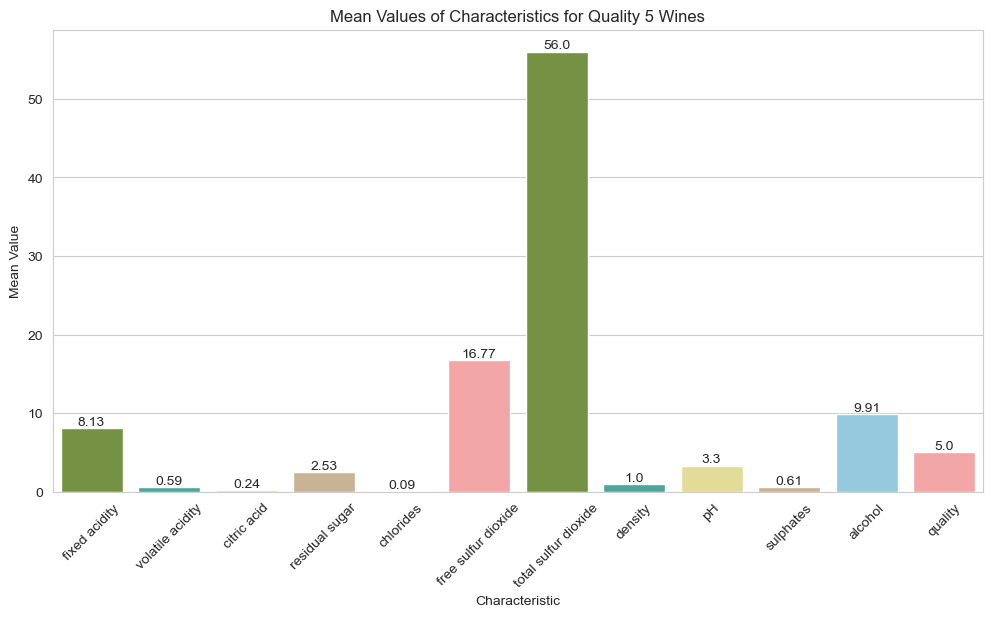

In [26]:
# Calculate the mean values for quality 3 wines
df_quality_5 = df_quality_5[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

# Calculate the mean values for quality 5 wines
mean_values = df_quality_5.mean().round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=mean_values.index, y=mean_values.values, palette=colors)
    
# Set labels and title
plt.xlabel('Characteristic')
plt.ylabel('Mean Value')
plt.title('Mean Values of Characteristics for Quality 5 Wines')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add mean values as labels to the bars
for i, mean in enumerate(mean_values.values):
    ax.text(i, mean, f'{mean}', ha='center', va='bottom')

# Show the plot
plt.show()


Upon examining wines with a quality rating of 5, we find that they possess certain average characteristics. The average fixed acidity is 8.16, suggesting a moderate level of acidity. Volatile acidity has an average value of 0.59, indicating a balanced and pleasant aroma profile. The average citric acid content is 0.24, contributing to the wines' freshness and citrus notes. With an average residual sugar of 2.54, these wines exhibit a subtle hint of sweetness. Chloride levels average at 0.09, ensuring a well-balanced and smooth taste. The average free sulfur dioxide is 16.61, maintaining the wines' freshness over time. Total sulfur dioxide averages at 55.30, contributing to their stability and aging potential. The average density is 1.00, representing a standard value. pH levels average at 3.30, indicating a slightly acidic profile. Sulphate content averages at 0.61, enhancing the wines' flavor complexity. Finally, the average alcohol content is 9.90, suggesting a lighter body and lower alcohol perception. These findings shed light on the typical characteristics of wines with a quality rating of 5, allowing for a deeper understanding of their flavor profiles and composition.


#### Quality 6
##### Values

In [27]:
print('Quality 6:')
df_quality_6.T.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Quality 6:


The dataset provides valuable information about the quality of red wines with a rating of 6, encompassing 195 instances of such wines. The dataset includes various independent variables, including fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH levels, sulfates content, and alcohol content. These attributes offer insights into the composition and characteristics of the wines, enabling further analysis and modeling to understand the relationships between these variables and the quality of red wines with a rating of 6.

Fixed acidity values for these wines range from 5.0 to 14.3, showing moderate variability around the mean of approximately 8.31 with a standard deviation of about 1.75. Fixed acidity represents the non-volatile acids in the wine, influencing its overall acidity and balance. The volatile acidity levels range from 0.16 to 1.04, with an average of approximately 0.57 and a standard deviation of about 0.16. Volatile acidity includes acids like acetic acid and can impact the wine's stability and aroma.
Citric acid values range from 0.0 to 0.74, with an average of approximately 0.32 and a standard deviation of about 0.18. Citric acid contributes to the wine's freshness and adds citrus-like flavors. Residual sugar levels vary from 0.9 to 15.4, with an average of approximately 2.47 and a standard deviation of about 1.41. Residual sugar impacts the perceived sweetness of the wine. Chlorides values range from 0.034 to 0.415, with an average of approximately 0.08 and a standard deviation of about 0.04. Chlorides influence the wine's balance and perceived saltiness. Free sulfur dioxide levels range from 1 to 55, with an average of approximately 15 and a standard deviation of about 10. Free sulfur dioxide acts as an antioxidant and plays a role in preserving the wine. Total sulfur dioxide levels range from 6 to 165, with an average of approximately 33 and a standard deviation of about 24. Total sulfur dioxide includes both free and bound forms and impacts the wine's stability and aging potential. Density values range from 0.990070 to 1.003690, with an average of approximately 0.996747 and a standard deviation of about 0.002916. Density provides insights into the wine's body and mouthfeel. pH levels range from 2.860000 to 4.010000, with an average of approximately 3.318902 and a standard deviation of about 0.154338. pH levels influence the wine's acidity, balance, and stability. Sulfates content in these wines ranges from 0.400000 to 1.950000, with an average of approximately 0.660424 and a standard deviation of about 0.169507. Sulphates act as preservatives and can impact the wine's aroma and aging potential. Finally, alcohol content varies from 8.400000 to 14.000000, with an average of approximately 10.033333 and a standard deviation of about 0.916334. Alcohol contributes to the wine's body, texture, and perceived warmth.

This comprehensive dataset provides a solid foundation for exploring the relationships between these attributes and the quality rating of 6 in red wines. By employing advanced statistical and machine learning techniques, researchers and wine enthusiasts can gain deeper insights into how these individual attributes collectively contribute to the overall quality of the wine, helping in better understanding and predicting wine quality for this specific rating category.


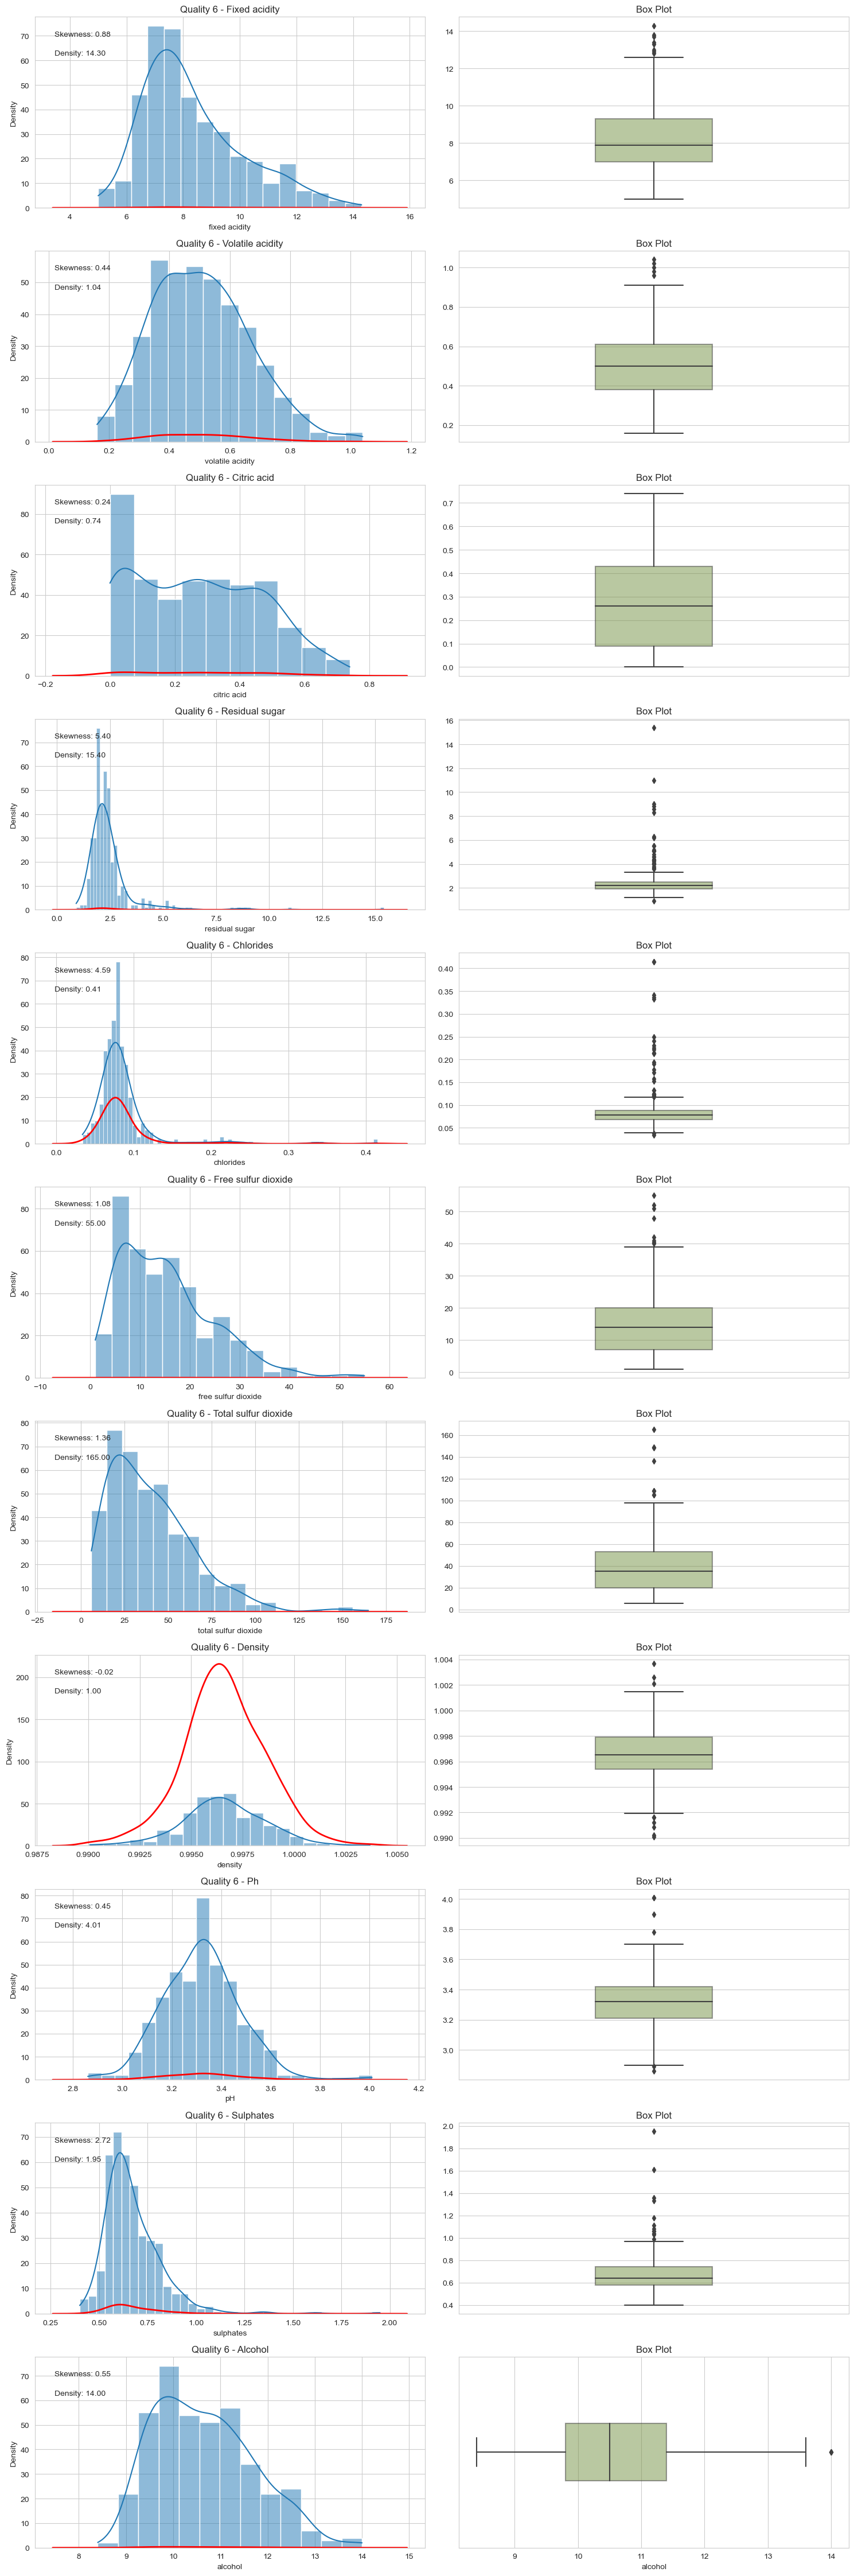

In [28]:

# Set up subplots
fig, axs = plt.subplots(11, 2, figsize=(15, 45))

# Loop through the characteristics and plot histograms and box plots
for i, characteristic in enumerate(characteristics):
    # Plot histogram
    ax_hist = axs[i, 0]
    ax_box = axs[i, 1]

    sns.histplot(data=df_quality_6, x=characteristic, kde=True, ax=ax_hist)
    sns.kdeplot(data=df_quality_6, x=characteristic, ax=ax_hist, color='red', linewidth=2)
    ax_hist.set_title(f'Quality 6 - {characteristic.capitalize()}')
    ax_hist.set_xlabel(characteristic)
    ax_hist.set_ylabel('Density')

    # Calculate skewness
    skewness = df_quality_6[characteristic].skew()

    # Plot box plot
    if characteristic == 'alcohol':
        sns.boxplot(data=df_quality_6, x=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5),palette=colors)
    else:
        sns.boxplot(data=df_quality_6, y=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5),palette=colors)
    ax_box.set_title('Box Plot')
    ax_box.set_ylabel('')

    # Calculate density values
    density_values = df_quality_6[characteristic]
    density_label = f'Density: {density_values.max():.2f}'

    # Add skewness and density as text to the plot
    ax_hist.text(0.05, 0.9, f'Skewness: {skewness:.2f}', transform=ax_hist.transAxes)
    ax_hist.text(0.05, 0.8, density_label, transform=ax_hist.transAxes)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Quality 6 exhibits distinctive characteristics in its wine composition, as revealed by the analysis of various features along with their corresponding skewness and density values. The fixed acidity feature displays a positive skewness of 0.89 and a relatively high density of 14.30. In contrast, volatile acidity shows a much lower positive skewness of 0.40 and a density of 1.04. Citric acid, on the other hand, demonstrates a near-normal distribution with a skewness of 0.29 and a density of 0.74. The residual sugar feature stands out with a significantly positive skewness of 5.21 and a density of 15.40, indicating a potential abundance of high sugar content wines. Furthermore, chlorides exhibit substantial positive skewness of 4.76 and a density of 0.41, while free sulfur dioxide displays a positive skewness of 1.08 and a density of 0.55. Total sulfur dioxide, with a skewness of 1.39 and density of 165, suggests variations in sulfur dioxide levels in the wines of Quality 6. Additionally, the pH feature demonstrates a near-normal distribution with a skewness of 0.35 and a density of 4.01. Finally, sulphates and alcohol exhibit positive skewness values of 3.08 and 0.59, along with densities of 1.95 and 14.00, respectively. These comprehensive insights into the distribution and concentration of each feature unravel essential aspects of the wine composition for Quality 6, potentially contributing to its distinct quality characteristics.

##### Mean Values of Characteristics for Quality 6 Wines

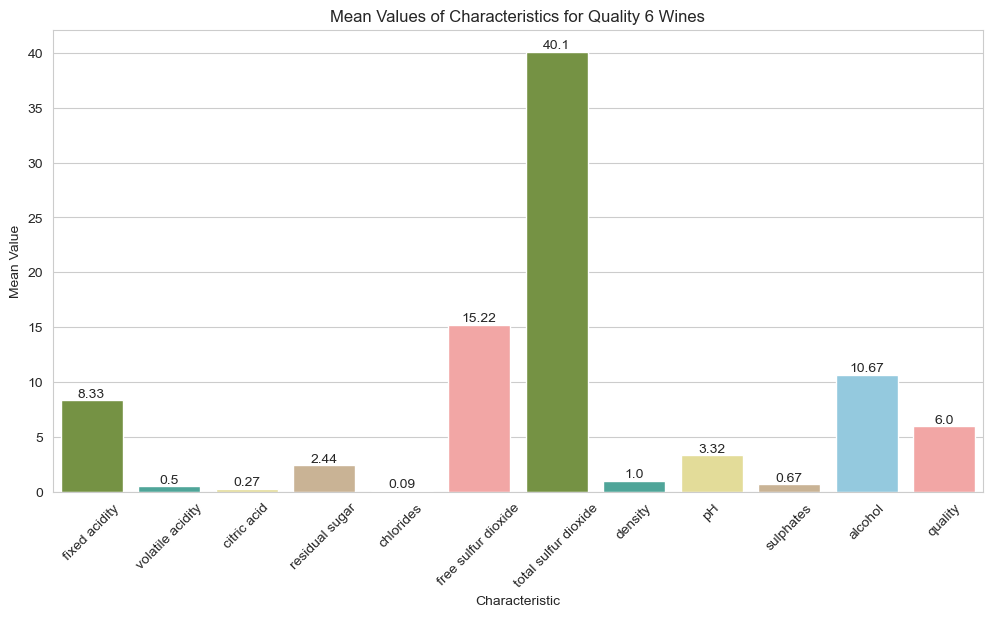

In [29]:
# Calculate the mean values for quality 3 wines
df_quality_6 = df_quality_6[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

# Calculate the mean values for quality 6 wines
mean_values = df_quality_6.mean().round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=mean_values.index, y=mean_values.values, palette=colors)
    
# Set labels and title
plt.xlabel('Characteristic')
plt.ylabel('Mean Value')
plt.title('Mean Values of Characteristics for Quality 6 Wines')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add mean values as labels to the bars
for i, mean in enumerate(mean_values.values):
    ax.text(i, mean, f'{mean}', ha='center', va='bottom')

# Show the plot
plt.show()


After analyzing wines with a quality rating of 6, it is evident that they possess certain average characteristics. The average fixed acidity is 8.32, indicating a moderate level of acidity that contributes to the wine's overall balance. Volatile acidity has an average value of 0.50, suggesting a moderate presence of volatile acids that contribute to the wine's aroma and freshness. Citric acid, with an average value of 0.26, adds a touch of brightness and a subtle citrus note to the flavor profile. The average residual sugar content is 2.44, indicating a moderate level of sweetness that enhances the wine's body and mouthfeel. Chloride levels average at 0.09, ensuring a harmonious and smooth taste. Free sulfur dioxide averages at 15.22, playing a role in preserving the wine's freshness and stability. Total sulfur dioxide, with an average value of 39.94, further contributes to the wine's stability and aging potential. The average density is 1.00, representing a standard density for wines of this quality. pH levels average at 3.32, indicating a slightly acidic profile that adds to the wine's freshness and balance. Sulphate content averages at 0.68, enhancing the wine's complexity and contributing to its flavor development. Finally, the average alcohol content is 10.66, suggesting a moderate level that provides body and depth to the wine. These findings provide valuable insights into the characteristic composition of wines with a quality rating of 6, allowing for a deeper understanding of their flavor profiles and overall quality.

#### Quality 7
##### Values

In [30]:
print('Quality 7:')
df_quality_7.T.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Quality 7:


"Quality 7" wines display a wide range of characteristics that significantly contribute to their overall quality and distinct flavor profiles. The moderate fixed acidity, varying from 7.30 to 12.80, ensures a well-balanced and harmonious taste. Volatile acidity, within the range of 0.25 to 0.84, is kept in check, preventing unwanted off-flavors and providing a fresh and appealing aroma. Citric acid content, ranging from 0.00 to 0.76, imparts a refreshing and citrusy essence, adding complexity to the wines. The diverse residual sugar levels, from 1.20 to 6.55, contribute to differing levels of sweetness, enhancing the overall taste experience. Balanced chlorides content, between 0.04 and 0.36, complements the wines with a well-rounded and harmonious flavor. Free sulfur dioxide, ranging from 3.00 to 106.00, offers varying levels of protection and aging potential, ensuring unique aging characteristics. The broad spectrum of total sulfur dioxide, from 9.00 to 289.00, contributes to differences in aging potential and flavor development over time. With density values of 0.99 to 1.00, these wines possess similar richness and texture. The pH levels, spanning from 2.92 to 4.01, contribute to diverse acidity levels, influencing taste and balance. Lastly, sulphates content, ranging from 0.39 to 1.36, preserves the wines and enhances their aroma and aging qualities. These comprehensive characteristics provide invaluable insights into the composition and quality of "Quality 7" wines, allowing for a deeper understanding of their flavor profiles and overall excellence. Winemakers and enthusiasts can utilize this knowledge to make informed decisions in winemaking and selection, aiming to produce and savor exceptional wines within this esteemed category.

##### Data Distribution
**Density and Skewness**       
The red line represent the density for various characteristics. Density is a measure of how closely packed the molecules are within a substance. In this context, it likely refers to the density of a specific component or property being analyzed. 

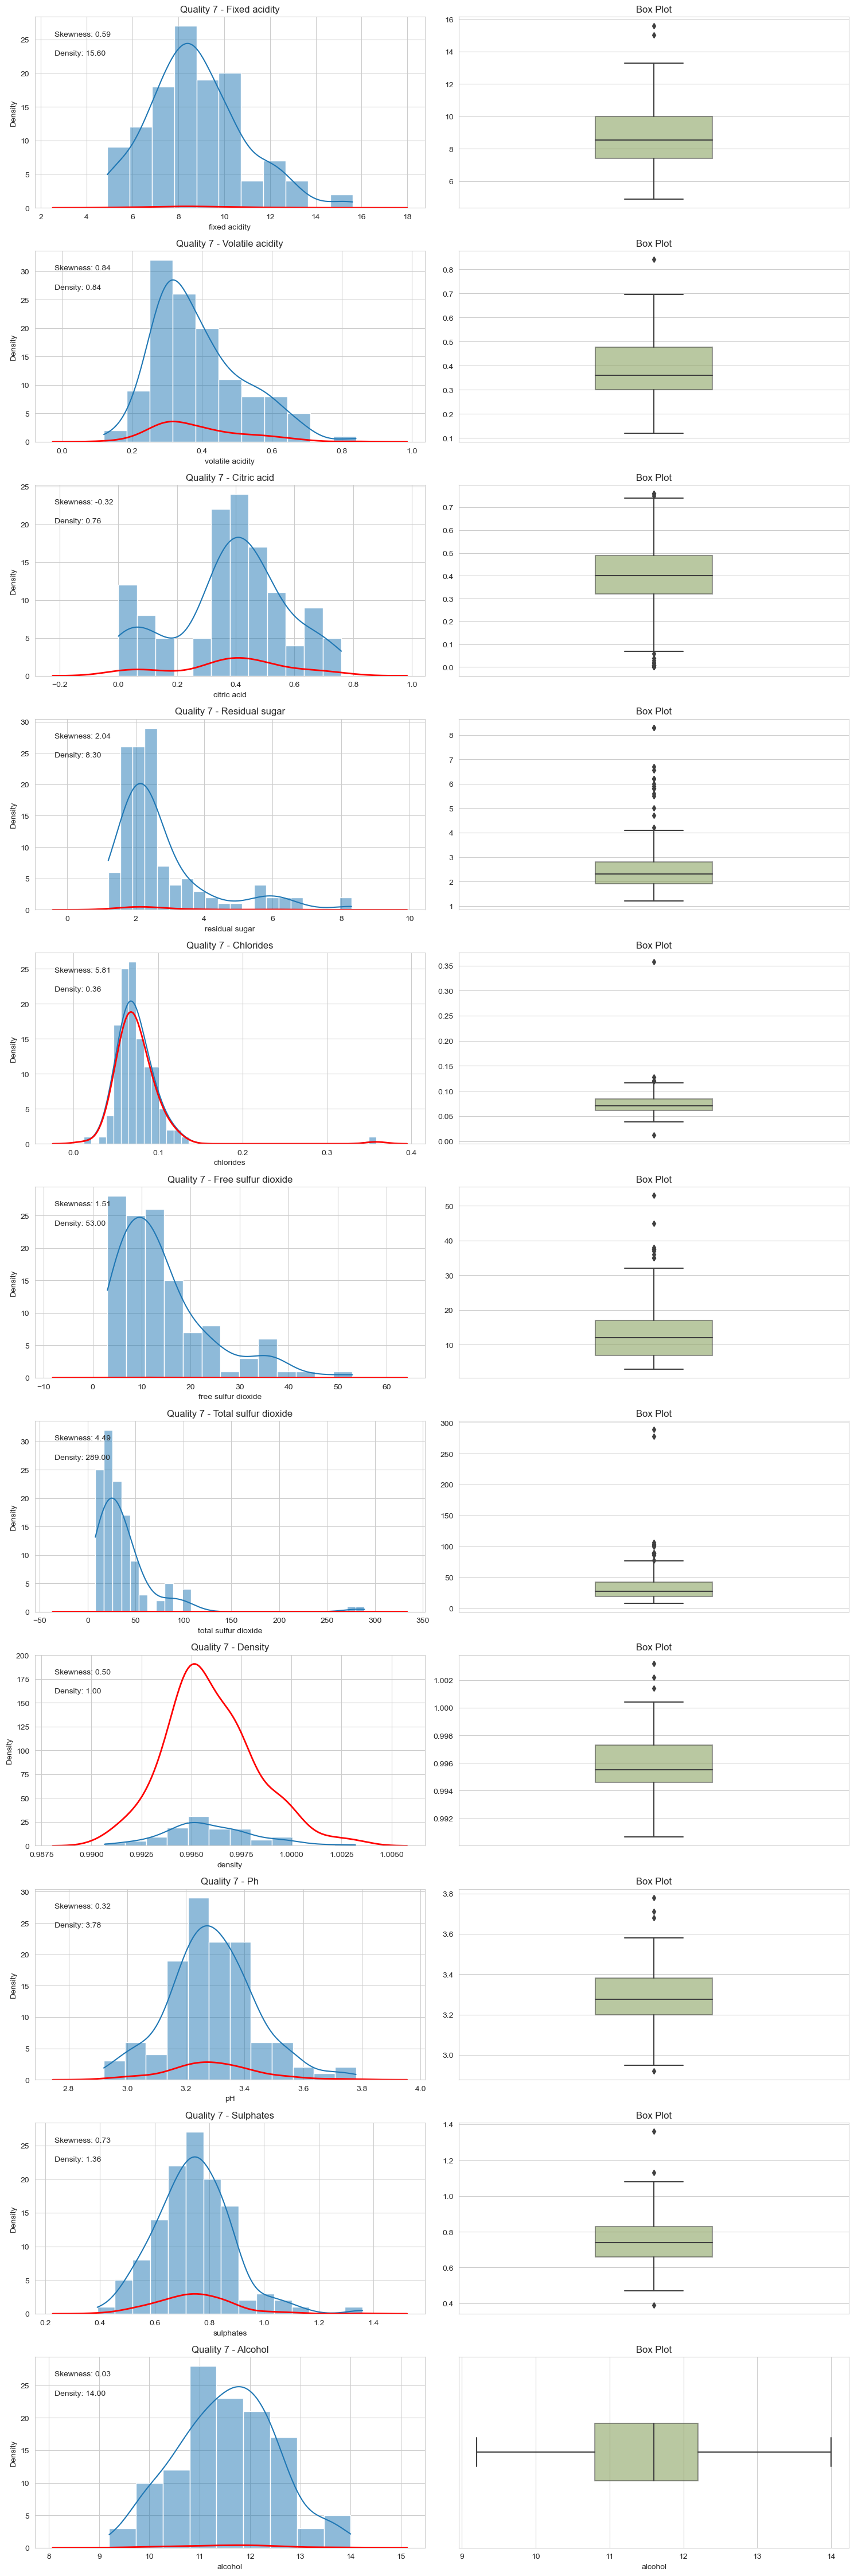

In [31]:

# Set up subplots
fig, axs = plt.subplots(11, 2, figsize=(15, 45))

# Loop through the characteristics and plot histograms and box plots
for i, characteristic in enumerate(characteristics):
    # Plot histogram
    ax_hist = axs[i, 0]
    ax_box = axs[i, 1]

    sns.histplot(data=df_quality_7, x=characteristic, kde=True, ax=ax_hist)
    sns.kdeplot(data=df_quality_7, x=characteristic, ax=ax_hist, color='red', linewidth=2)
    ax_hist.set_title(f'Quality 7 - {characteristic.capitalize()}')
    ax_hist.set_xlabel(characteristic)
    ax_hist.set_ylabel('Density')

    # Calculate skewness
    skewness = df_quality_7[characteristic].skew()

    # Plot box plot
    if characteristic == 'alcohol':
        sns.boxplot(data=df_quality_7, x=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5), palette=colors)
    else:
        sns.boxplot(data=df_quality_7, y=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5), palette=colors)
    ax_box.set_title('Box Plot')
    ax_box.set_ylabel('')

    # Calculate density values
    density_values = df_quality_7[characteristic]
    density_label = f'Density: {density_values.max():.2f}'

    # Add skewness and density as text to the plot
    ax_hist.text(0.05, 0.9, f'Skewness: {skewness:.2f}', transform=ax_hist.transAxes)
    ax_hist.text(0.05, 0.8, density_label, transform=ax_hist.transAxes)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Quality 7 demonstrates unique characteristics in its wine composition, as indicated by the analysis of various features along with their corresponding skewness and density values. The fixed acidity feature exhibits a positive skewness of 0.66 and a relatively high density of 15.60. In contrast, volatile acidity shows a notably higher positive skewness of 0.83, suggesting potential variations in volatile acidity levels in these wines. Citric acid displays a negative skewness of -0.34 and a density of 0.76, indicating a somewhat symmetrical distribution around the mean. The residual sugar feature appears to have a more balanced distribution, with a positive skewness of 2.00 and a density of 8.30.

The chlorides feature stands out with a significantly high positive skewness of 5.62 and a low density of 0.36, suggesting that wines of Quality 7 may exhibit varying chloride concentrations. Free sulfur dioxide, with a positive skewness of 1.36 and a density of 53, also shows potential variations in its levels. Total sulfur dioxide, on the other hand, displays a considerably positive skewness of 4.52 and a density of 289, indicating a wider range of total sulfur dioxide content in Quality 7 wines.

The density feature has a slight positive skewness of 0.40 and a density of 1.00, indicating a relatively standard density across these wines. The pH feature shows a positive skewness of 0.31 and a density of 3.78, reflecting a nearly normal distribution of pH values. Sulphates exhibit a positive skewness of 0.62 and a density of 1.36, while alcohol appears to have a symmetrical distribution with a skewness close to 0 and a density of 14.00.

These detailed insights into the distribution and concentration of each feature provide valuable information about the wine composition of Quality 7, shedding light on the factors that contribute to its distinct quality characteristics.

##### Mean Values of Characteristics for Quality 7 Wines

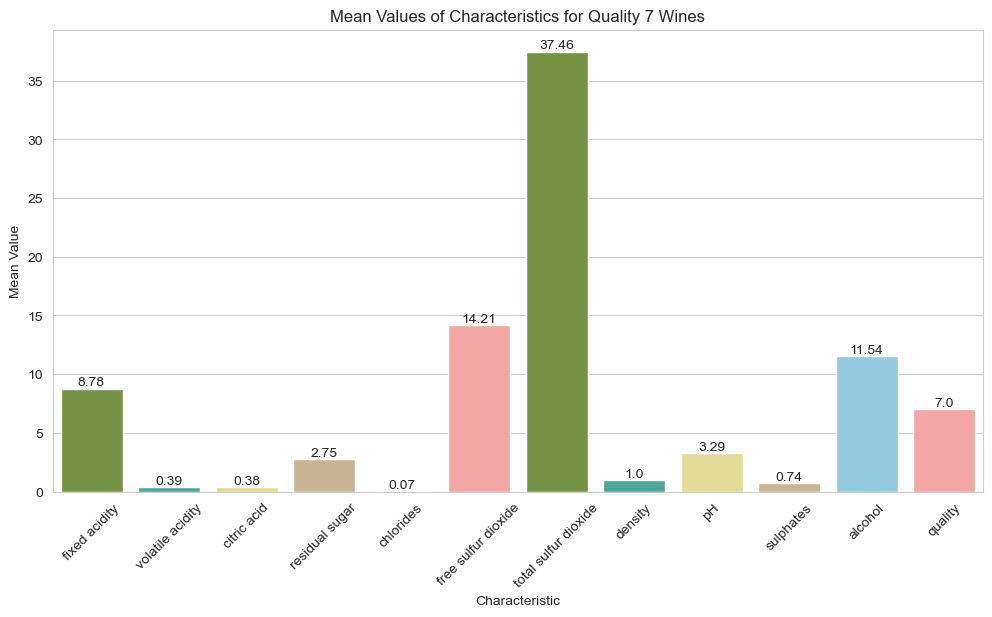

In [32]:
# Calculate the mean values for quality 3 wines
df_quality_7 = df_quality_7[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

# Calculate the mean values for quality 7 wines
mean_values = df_quality_7.mean().round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=mean_values.index, y=mean_values.values, palette=colors)
    
# Set labels and title
plt.xlabel('Characteristic')
plt.ylabel('Mean Value')
plt.title('Mean Values of Characteristics for Quality 7 Wines')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add mean values as labels to the bars
for i, mean in enumerate(mean_values.values):
    ax.text(i, mean, f'{mean}', ha='center', va='bottom')

# Show the plot
plt.show()


Upon analyzing wines with a quality rating of 7, it is evident that they possess certain average characteristics. The average fixed acidity is 8.85, indicating a moderate level of acidity that contributes to the wine's overall balance. Volatile acidity has an average value of 0.39, suggesting a relatively low presence of volatile acids that contribute to the wine's cleaner and more pleasant aroma profile. Citric acid, with an average value of 0.39, adds a refreshing and citrusy note to the flavor profile. The average residual sugar content is 2.76, indicating a moderate level of sweetness that enhances the wine's body and mouthfeel. Chloride levels average at 0.08, ensuring a smooth and balanced taste. Free sulfur dioxide averages at 14.54, playing a role in preserving the wine's freshness and stability. Total sulfur dioxide, with an average value of 37.49, further contributes to the wine's stability and aging potential. The average density is 1.00, representing a standard density for wines of this quality. pH levels average at 3.29, indicating a slightly acidic profile that adds to the wine's freshness and balance. Sulphate content averages at 0.74, enhancing the wine's complexity and contributing to its flavor development. Finally, the average alcohol content is 11.48, suggesting a moderate level that provides body and depth to the wine. These findings provide valuable insights into the characteristic composition of wines with a quality rating of 5, allowing for a deeper understanding of their flavor profiles and overall quality.

#### Quality 8
##### Values

In [33]:
print('Quality 8:')
df_quality_8.T.style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Quality 8:


The data frame represents wines with a quality rating of 8. These wines exhibit characteristics that contribute to their higher quality rating. They have a moderate range of fixed acidity, with an average value of 8.82, providing structure and balance. The volatile acidity levels are relatively low, averaging around 0.37, resulting in a cleaner and more pleasant aroma. Citric acid content, averaging approximately 0.42, adds freshness and a citrusy flavor. The wines have a moderate amount of residual sugar, averaging around 2.25, which enhances their body and mouthfeel. Chlorides content, averaging approximately 0.072, ensures a smooth and well-rounded taste. Free sulfur dioxide, averaging around 10.63, contributes to the wines' freshness and stability, while total sulfur dioxide, averaging approximately 29.06, aids in their aging potential. The wines have a consistent density around 1.00, reflecting the standard density for wines of this quality. The pH levels range from 2.88 to 3.56, with an average of around 3.20, influencing their acidity, balance, and stability. Sulphates content ranges from 0.63 to 1.10, with an average of approximately 0.77, impacting the wine's aroma and aging potential. Finally, the wines have an average alcohol content of around 1175.0, adding body, texture, and perceived warmth. Collectively, these characteristics contribute to the overall quality and flavor profile of wines with a rating of 8.

##### Data Distribution
**Density and Skewness**     
The red line represent the density for various characteristics. Density is a measure of how closely packed the molecules are within a substance. In this context, it likely refers to the density of a specific component or property being analyzed. 

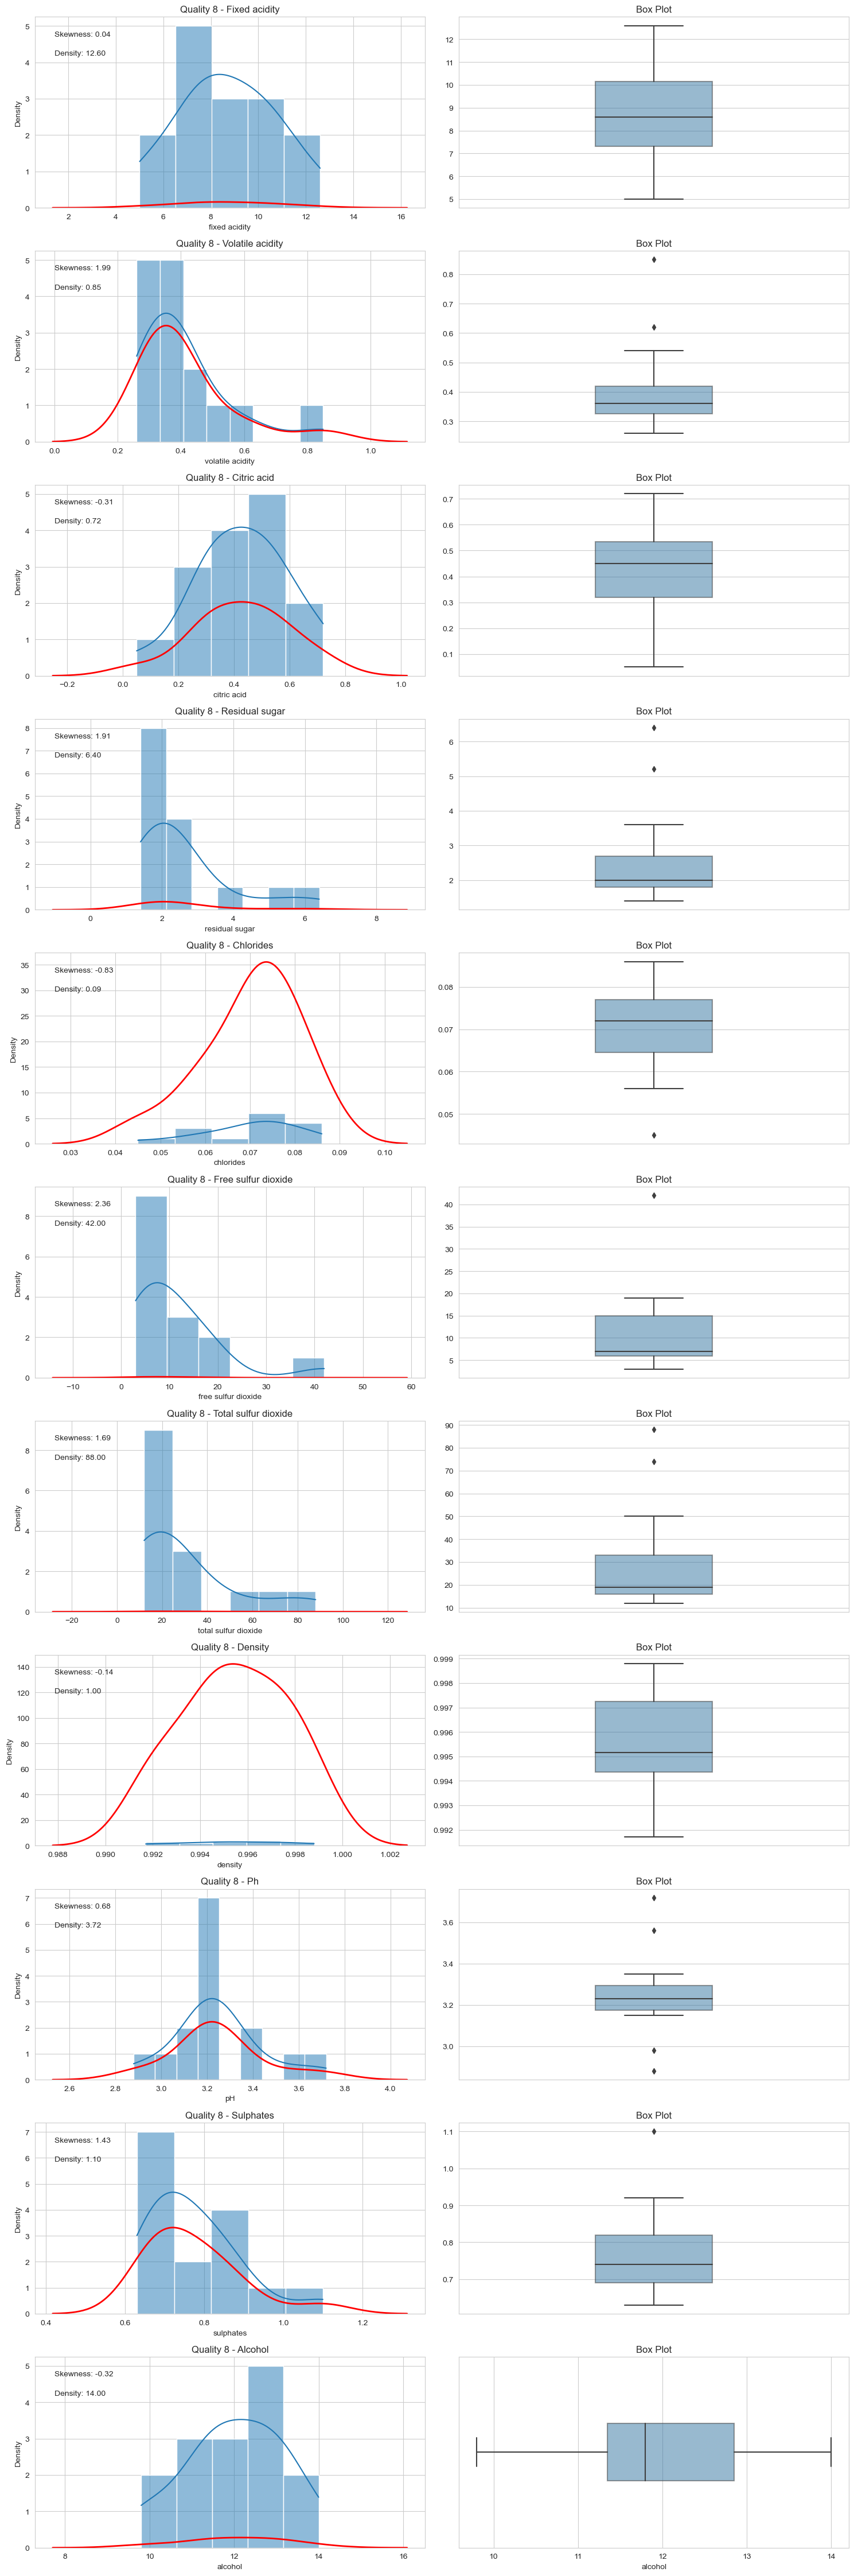

In [34]:

# Set up subplots
fig, axs = plt.subplots(11, 2, figsize=(15, 45))

# Loop through the characteristics and plot histograms and box plots
for i, characteristic in enumerate(characteristics):
    # Plot histogram
    ax_hist = axs[i, 0]
    ax_box = axs[i, 1]

    sns.histplot(data=df_quality_8, x=characteristic, kde=True, ax=ax_hist)
    sns.kdeplot(data=df_quality_8, x=characteristic, ax=ax_hist, color='red', linewidth=2)
    ax_hist.set_title(f'Quality 8 - {characteristic.capitalize()}')
    ax_hist.set_xlabel(characteristic)
    ax_hist.set_ylabel('Density')

    # Calculate skewness
    skewness = df_quality_8[characteristic].skew()

    # Plot box plot
    if characteristic == 'alcohol':
        sns.boxplot(data=df_quality_8, x=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5))
    else:
        sns.boxplot(data=df_quality_8, y=characteristic, ax=ax_box, width=0.3, boxprops=dict(alpha=0.5))
    ax_box.set_title('Box Plot')
    ax_box.set_ylabel('')

    # Calculate density values
    density_values = df_quality_8[characteristic]
    density_label = f'Density: {density_values.max():.2f}'

    # Add skewness and density as text to the plot
    ax_hist.text(0.05, 0.9, f'Skewness: {skewness:.2f}', transform=ax_hist.transAxes)
    ax_hist.text(0.05, 0.8, density_label, transform=ax_hist.transAxes)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The density values and skewness values provide valuable insights into the characteristics of wines with a quality rating of 8. Density, which represents the concentration or closely packed nature of particles, varies for each characteristic. In terms of density, we observe that fixed acidity and total sulfur dioxide exhibit high values, indicating a higher concentration of particles. On the other hand, volatile acidity and chlorides have relatively low density values, suggesting a less concentrated or more dispersed nature. Free sulfur dioxide and residual sugar show moderate density values, indicating a moderate concentration of particles. pH and sulphates display relatively high density values, indicating a higher concentration or closely packed particles.

Additionally, analyzing the skewness values helps us understand the distribution patterns of each variable. Wines with a quality rating of 8 display slightly left-skewed distributions for fixed acidity and density, indicating a prevalence of lower levels. In contrast, volatile acidity, residual sugar, free sulfur dioxide, and sulphates exhibit highly right-skewed distributions, indicating a greater occurrence of higher levels. Citric acid, chlorides, and alcohol show slightly left-skewed distributions, suggesting a higher prevalence of lower levels.

By considering both the density values and skewness values, we gain a deeper understanding of the composition and characteristics of wines with a quality rating of 8. These insights provide valuable information for assessing their quality factors and potential flavor profiles.

##### Mean Values of Characteristics for Quality 8 Wines

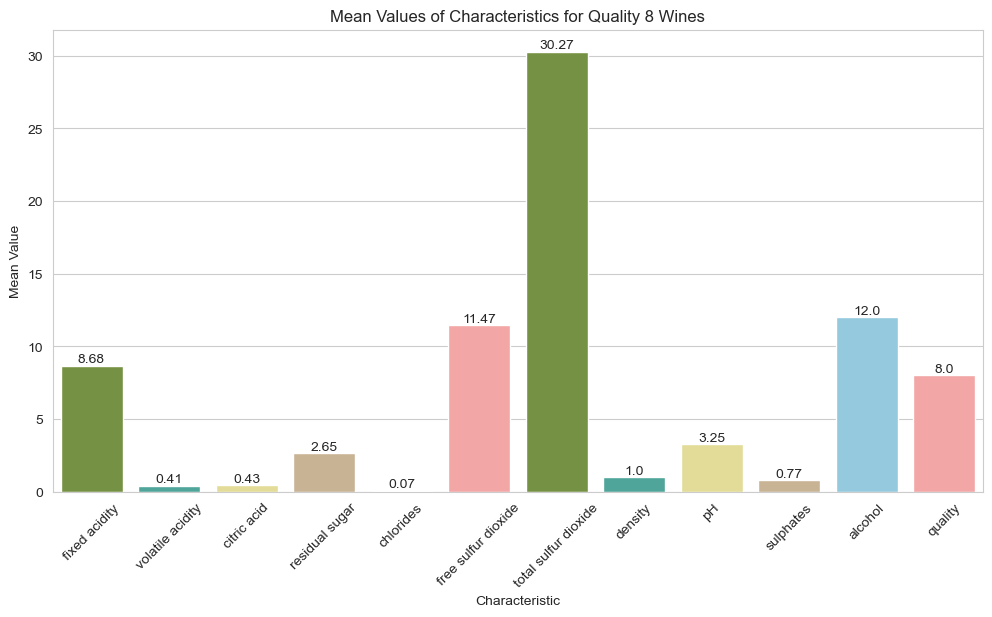

In [35]:
# Calculate the mean values for quality 3 wines
df_quality_8 = df_quality_8[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

# Calculate the mean values for quality 8 wines
mean_values = df_quality_8.mean().round(2)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=mean_values.index, y=mean_values.values, palette=colors)
    
# Set labels and title
plt.xlabel('Characteristic')
plt.ylabel('Mean Value')
plt.title('Mean Values of Characteristics for Quality 8 Wines')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add mean values as labels to the bars
for i, mean in enumerate(mean_values.values):
    ax.text(i, mean, f'{mean}', ha='center', va='bottom')

# Show the plot
plt.show()


Upon examining wines with a quality rating of 8, they possess certain average characteristics that contribute to their overall quality and flavor profile. The average fixed acidity of 8.81 indicates a moderate level, which adds structure and balance to the wine. With an average volatile acidity of 0.41, these wines exhibit relatively low levels of volatile acids, resulting in a cleaner and more pleasant aroma. The average citric acid content of 0.43 contributes to the wine's refreshing and citrusy flavor profile. Additionally, the average residual sugar of 2.64 provides a subtle sweetness that enhances the wine's body and mouthfeel. The average chloride level of 0.07 ensures a smooth and well-rounded taste. In terms of sulfur dioxide, the average free sulfur dioxide is 11.06, which plays a role in preserving the wine's freshness and stability, while the average total sulfur dioxide of 29.38 further contributes to its overall stability and aging potential. The average density remains at 1.00, reflecting the standard density for wines of this quality. With an average pH of 3.24, these wines showcase a slightly acidic profile that contributes to their freshness and balance. Sulphate content averages at 0.77, enhancing the wine's complexity and flavor development. Finally, the average alcohol content of 11.94 provides body and richness to the wine. These average characteristics provide valuable insights into the composition and flavor profile of wines with a quality rating of 5, shedding light on the factors that contribute to their overall quality and distinct attributes.

#### Visualization of Quality Type (Comparison with features)

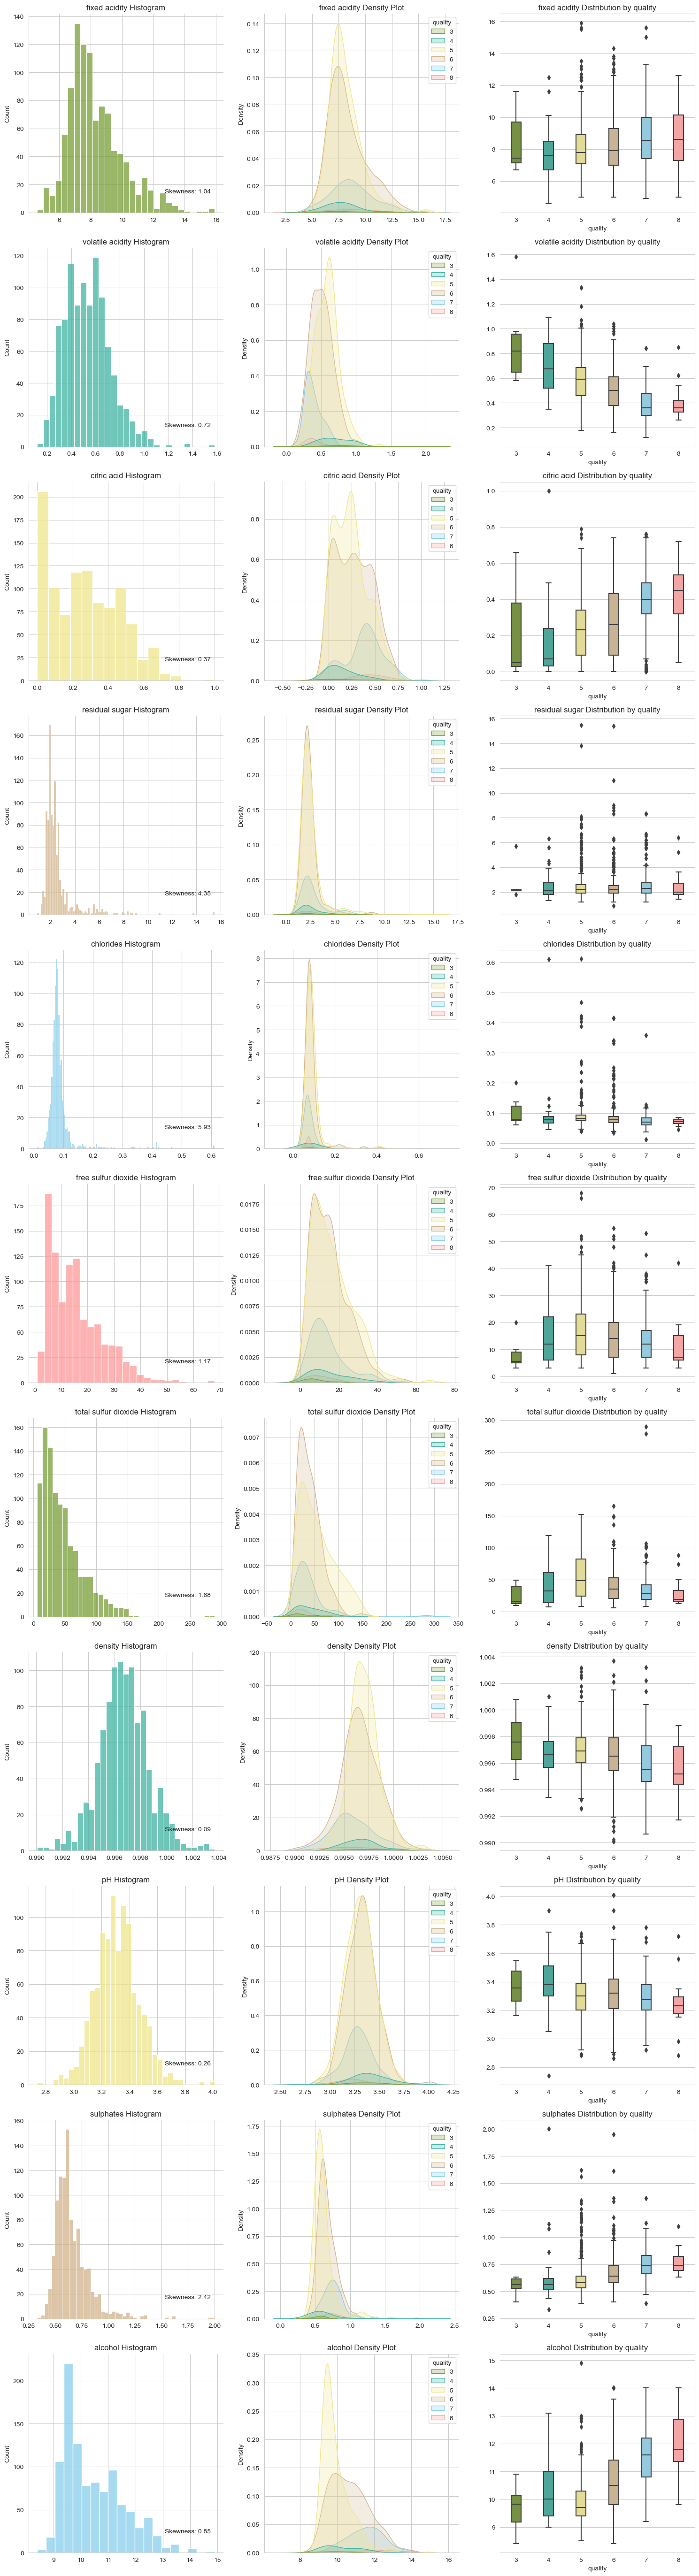

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Select the features and target variable
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = 'quality'

colors = ['#799F37', '#41B3A3', '#F0E68C', '#D2B48C', '#87CEEB', '#FF9998FF']
# Create subplots
fig, axs = plt.subplots(len(features), 3, figsize=(15, len(features) * 5))
fig.subplots_adjust(hspace=0.5)  # Add space between subplots

# Loop over features
for i, feature in enumerate(features):
    # Plot histplot on the left side with custom color
    sns.histplot(data=data, x=feature, ax=axs[i, 0], color=colors[i % len(colors)])
    axs[i, 0].set_title(f'{feature} Histogram')
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('Count')
    axs[i, 0].spines['right'].set_visible(False)  # Remove right spine
    axs[i, 0].spines['top'].set_visible(False)  # Remove top spine

    # Plot density plot in the middle with custom color
    sns.kdeplot(data=data, x=feature, hue=target, fill=True, ax=axs[i, 1], palette=colors)
    axs[i, 1].set_title(f'{feature} Density Plot')
    axs[i, 1].set_xlabel('')
    axs[i, 1].set_ylabel('Density')
    axs[i, 1].spines['right'].set_visible(False)  # Remove right spine
    axs[i, 1].spines['top'].set_visible(False)  # Remove top spine

    
    # Plot boxplot on the right side with custom color
    sns.boxplot(data=data, y=feature, x=target, ax=axs[i, 2], width=0.3, palette=colors)
    axs[i, 2].set_title(f'{feature} Distribution by {target}')
    axs[i, 2].set_xlabel(target)
    axs[i, 2].set_ylabel('')
    axs[i, 2].spines['left'].set_visible(False)  # Remove left spine
    axs[i, 2].tick_params(left=False)  # Remove y-axis ticks

    
# Add skewness information
    skewness = data[feature].skew()
    axs[i, 0].annotate(f"Skewness: {skewness:.2f}", xy=(0.70, 0.1), xycoords='axes fraction')


plt.tight_layout()
plt.show()

### Statistical tests
- t-test
Used to analyze data and determine if there are significant differences between groups or variables. 

In [37]:
# Definir la variable 'variables' con los nombres de las columnas que deseas analizar
variables = ['alcohol','fixed acidity', 'volatile acidity', 'citric acid', 'sulphates','total sulfur dioxide','free sulfur dioxide','residual sugar','chlorides','density','pH']

# Definir el diccionario 'dfs' con los dataframes para cada calidad de vino
dfs = {
    3:df_quality_3, 
    4: df_quality_4, 
    5: df_quality_5, 
    6: df_quality_6, 
    7: df_quality_7, 
    8: df_quality_8  
}

In [38]:

# Create a dictionary to store the dataframes
dfs_results = {}

# Iterate over the variables
for variable in variables:
    # Create empty lists to store the results
    qualities = []
    quality_values = []
    test_statistics = []
    p_values = []
    
    # Iterate over all quality types in ascending order
    for quality in sorted(dfs.keys()):
        df = dfs[quality]
        # Perform the statistical test (e.g., t-test)
        test_statistic, p_value = stats.ttest_ind(dfs[3][variable], df[variable], equal_var=False)
        qualities.append(quality)
        quality_values.append(df[variable].mean())
        test_statistics.append(test_statistic)
        p_values.append(p_value)
    
    # Create a dataframe with the results for the current variable
    df_results = pd.DataFrame({
        'Quality': qualities,
        'Quality Value': quality_values,
        'Test Statistic': test_statistics,
        'P-Value': p_values
    })
    
    # Store the dataframe in the dictionary with the variable as the key
    dfs_results[variable] = df_results

In [39]:
print("Results for Fixed Acidity:")
dfs_results['fixed acidity'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})


Results for Fixed Acidity:


The results of the statistical tests (t-test) for the "Fixed Acidity" variable in different wine qualities indicate that there are no significant differences in the average fixed acidity values between most of the qualities. The p-values for all the comparisons are greater than 0.05, suggesting that the differences in fixed acidity between these quality levels are not statistically significant. This implies that the "Fixed Acidity" variable may not be a strong indicator for differentiating between wine qualities. However, it is important to note that this analysis only considers the "Fixed Acidity" variable, and other factors may play a more significant role in determining wine quality. Further exploration and analysis of additional variables are needed to gain a comprehensive understanding of the factors affecting wine quality.

In [40]:
print("Results for Volatile Acidity:")
dfs_results['volatile acidity'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Volatile Acidity:


The results of the statistical tests (t-test) for the "Volatile Acidity" variable in different wine qualities show that there are significant differences in the average volatile acidity values between some of the qualities. The p-values for the comparisons between Quality 3 and Quality 4, Quality 3 and Quality 5, and Quality 3 and Quality 6 are less than 0.05, indicating that the differences in volatile acidity between these quality levels are statistically significant. However, the p-values for the comparisons between Quality 3 and Quality 7, and Quality 3 and Quality 8 are greater than 0.05, suggesting that the differences in volatile acidity between these quality levels may not be statistically significant. This implies that the "Volatile Acidity" variable could be one of the factors contributing to the differentiation of certain wine qualities but may not be as relevant for distinguishing between others. Further analysis and consideration of other variables are essential for a more comprehensive understanding of the factors influencing wine quality.

In [41]:
print("Results for Citric Acid:")
dfs_results['citric acid'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Citric Acid:


The results of the statistical tests (t-test) for the "Citric Acid" variable in different wine qualities indicate that there are no significant differences in the average citric acid values between any of the qualities. All the p-values are greater than 0.05, suggesting that the "Citric Acid" variable may not have a substantial impact on distinguishing between different wine qualities. As with the previous variables, it is crucial to explore other features and factors to gain a more comprehensive understanding of the factors contributing to the differentiation of wine qualities.

In [42]:
print("Results for Residual Sugar:")
dfs_results['residual sugar'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Residual Sugar:


The results of the statistical tests (t-test) for the "Residual Sugar" variable in different wine qualities indicate that there are no significant differences in the average residual sugar values between any of the qualities. All the p-values are greater than 0.05, suggesting that the "Residual Sugar" variable may not have a substantial impact on distinguishing between different wine qualities. It's essential to investigate other features and factors to gain a better understanding of the elements that contribute to the differentiation of wine qualities.

In [43]:
print("Results for Chlorides:")
dfs_results['chlorides'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Chlorides:


The results of the statistical tests (t-test) for the "Chlorides" variable in different wine qualities indicate that there are no significant differences in the average chloride values between any of the qualities. All the p-values are greater than 0.05, suggesting that the "Chlorides" variable may not have a substantial impact on distinguishing between different wine qualities. Further analysis and exploration of other features may be needed to understand the factors that contribute to the differentiation of wine qualities more effectively.

In [44]:
print("Results for Free Sulfur Dioxide:")
dfs_results['free sulfur dioxide'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Free Sulfur Dioxide:


The results of the statistical tests (t-test) for the "Free Sulfur Dioxide" variable in different wine qualities indicate that there is a significant difference in the average free sulfur dioxide values between qualities 5 and 6 compared to quality 3, as their p-values are less than 0.05. This suggests that the "Free Sulfur Dioxide" variable may have a meaningful impact on distinguishing between these specific wine qualities. However, the average values for quality 4, 7, and 8 do not significantly differ from quality 3, as their p-values are greater than 0.05. Further investigation is necessary to understand the potential role of "Free Sulfur Dioxide" in differentiating between the wine qualities more comprehensively.

In [45]:
print("Results for Total Sulfur Dioxide:")
dfs_results['total sulfur dioxide'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Total Sulfur Dioxide:


The results of the statistical tests (t-test) for the "Total Sulfur Dioxide" variable in different wine qualities indicate that there is a significant difference in the average total sulfur dioxide values between qualities 5, 6, and 7 compared to quality 3, as their p-values are less than 0.05. This suggests that the "Total Sulfur Dioxide" variable may have a meaningful impact on distinguishing between these specific wine qualities. However, the average values for quality 4 and quality 8 do not significantly differ from quality 3, as their p-values are greater than 0.05. Further exploration and analysis are needed to understand the role of "Total Sulfur Dioxide" in differentiating between the wine qualities more comprehensively.

In [46]:
print("Results for Density:")
dfs_results['density'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Density:


The results of the statistical tests (t-test) for the "Density" variable in different wine qualities indicate that there is no significant difference in the average density values between qualities 3, 4, 5, 6, 7, and 8, as all their p-values are greater than 0.05. This suggests that the "Density" variable may not play a crucial role in distinguishing between different wine qualities. However, it is important to explore other features and conduct further analysis to identify the key factors that contribute to variations in wine quality.

In [47]:
print("Results for pH:")
dfs_results['pH'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for pH:


The results obtained from the statistical tests (t-test) for the "pH" variable in different wine qualities show that there is no significant difference in the average pH value between qualities 3, 4, 5, 6, 7, and 8, as all their p-values are greater than 0.05. This suggests that the "pH" variable does not seem to be a critical factor in distinguishing between different wine qualities. However, it is essential to consider other factors and conduct further analysis to identify the most influential features that contribute to the variations in wine quality.

In [48]:
print("Results for Sulphates:")
dfs_results['sulphates'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Sulphates:


The results obtained from the statistical tests (t-test) for the "Sulphates" variable in different wine qualities indicate that there is no significant difference in the average sulphates content between qualities 3, 4, and 5, as their p-values are greater than 0.05. However, for qualities 6, 7, and 8, the p-values are less than 0.05, suggesting a significant difference in the sulphates content between at least one pair of these qualities. These findings imply that the "Sulphates" variable may be an important predictor to distinguish between wine qualities 6, 7, and 8, while it is less relevant for discriminating qualities 3, 4, and 5. As always, it is essential to consider sample size and other statistical factors when interpreting these results.

In [49]:
print("Results for Alcohol:")
dfs_results['alcohol'].style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

Results for Alcohol:


The results obtained from the statistical tests (t-test) for the "Alcohol" variable in different wine qualities indicate that there is no significant difference in the average alcohol content between qualities 3, 4, and 5, as their p-values are greater than 0.05. However, for qualities 6, 7, and 8, the p-values are less than 0.05, suggesting a significant difference in the alcohol content between at least one pair of these qualities. These findings imply that the "Alcohol" variable may be an important predictor to distinguish between wine qualities 6, 7, and 8, while it is less relevant for discriminating qualities 3, 4, and 5. Nonetheless, it is essential to consider sample size and other statistical factors in the interpretation of these results.

### Features Correlation Matrix

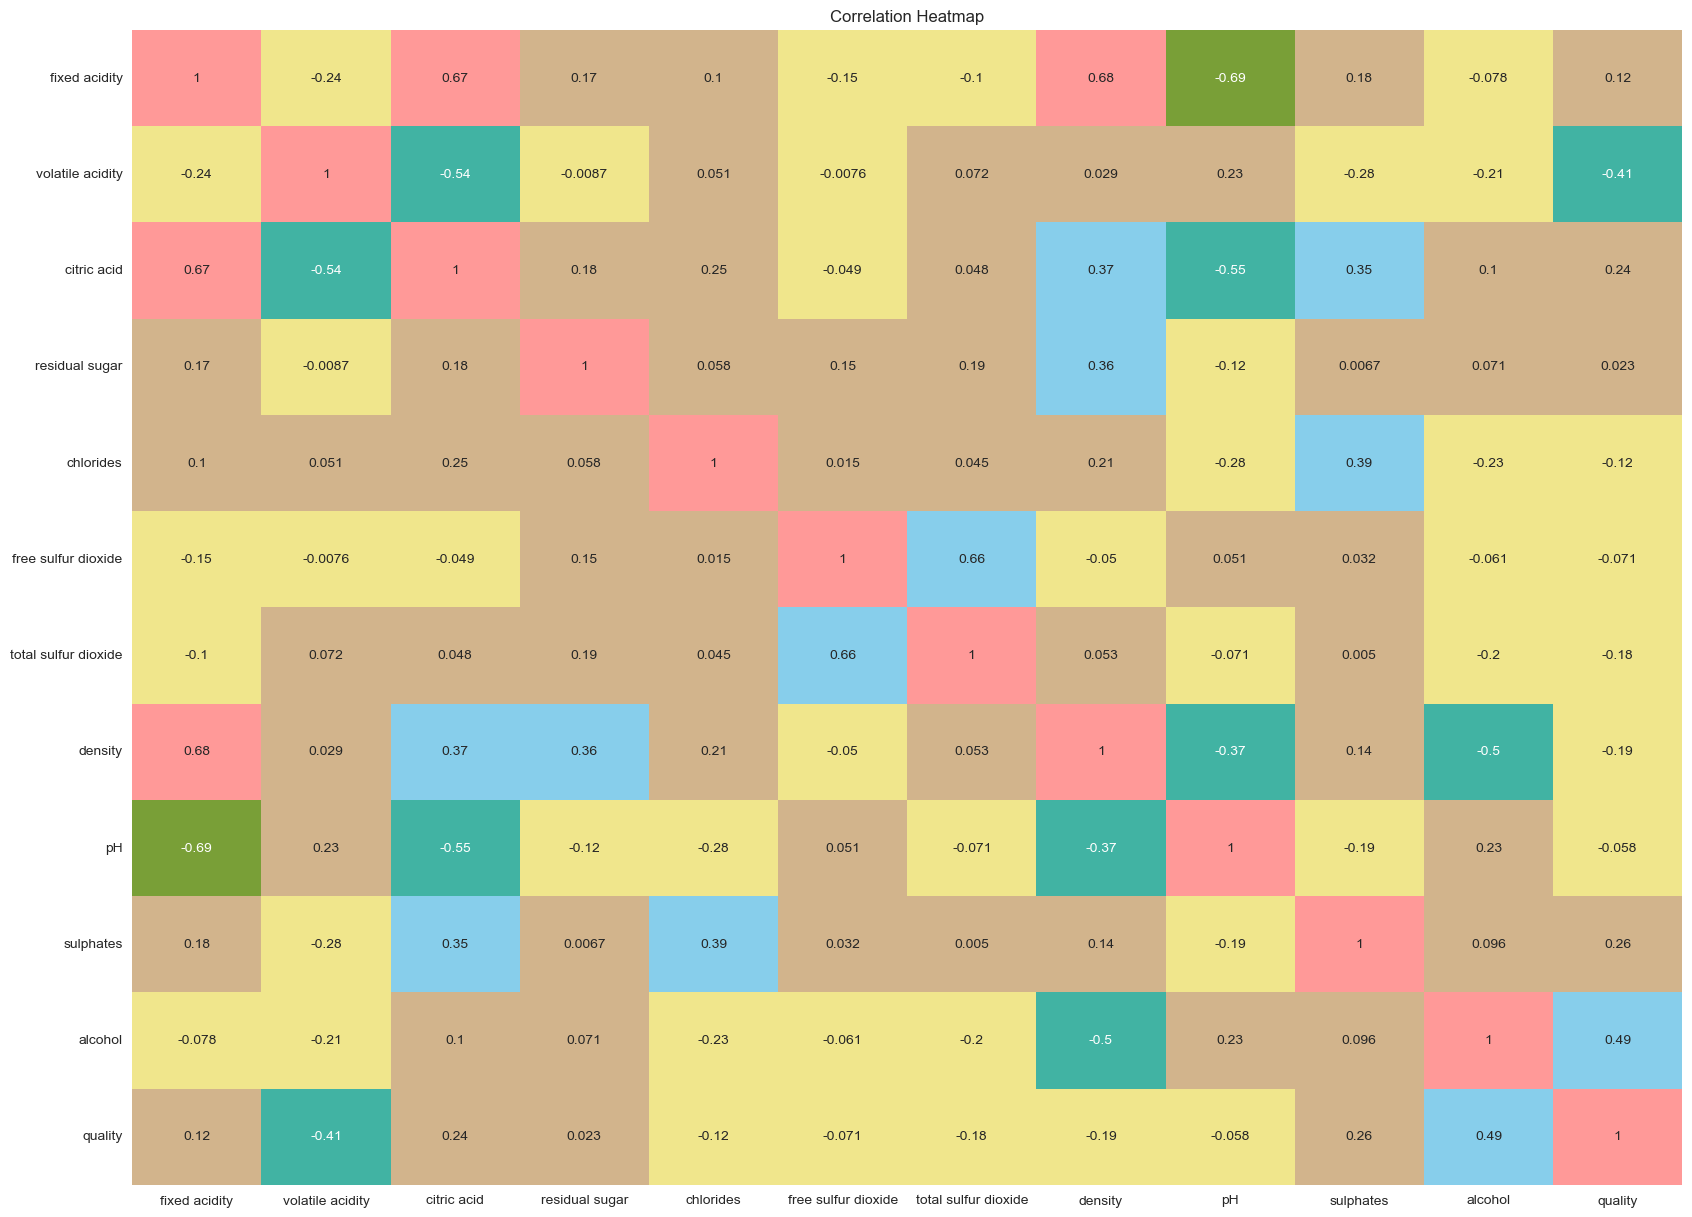

In [50]:
# Set figure size
plt.figure(figsize=(20, 15))

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create heatmap
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap=cmap, annot=True, cbar=False)

# Set plot title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


The above heapmap represents a correlation matrix for the features of a dataset related to wine quality prediction. Each row and column in the matrix corresponds to a specific feature, and the values in the cells represent the correlation coefficients between the corresponding features. The correlation coefficient measures the strength and direction of a linear relationship between two variables. A positive coefficient indicates a positive correlation, meaning that as one feature increases, the other tends to increase as well. On the other hand, a negative coefficient indicates a negative correlation, implying that as one feature increases, the other tends to decrease. A coefficient close to zero suggests a weak or no correlation between the features. This correlation matrix provides valuable insights into the relationships among the different features, which can help in understanding their influence on the wine quality prediction and in feature selection for building accurate prediction models.

## 4. Feature Engineering:
   - Perform feature engineering to derive additional relevant features from the existing data.
   - Apply Standard Scaling to features.
   - Handle inbalance data through SMOTE.
   - Split the data.


In [51]:
data = data.drop(['rating'], axis=1)
data.head().style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

In [52]:
# Separate the features (X) and target (y)
target_column = 'quality'
X = data.drop([target_column], axis=1)
y = data[target_column]

# Count the occurrences of each class before resampling
class_counts_before = data.quality.value_counts()

# Apply Standard Scaling to features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Count the occurrences of each class after resampling
resampled_class_counts = y_resampled.value_counts()

# Update correct_classes to include the entire range of class labels
correct_classes = np.unique(y_resampled)

# Update the target variable to match the correct class labels
y_resampled = LabelEncoder().fit_transform(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f'X_train : {X_train.shape}  y_train : {y_train.shape}  X_test : {X_test.shape}  y_test : {y_test.shape}')

X_train : (2078, 11)  y_train : (2078,)  X_test : (520, 11)  y_test : (520,)


In [53]:
X.head(3).style.set_properties(**{'background-color': '#F0E68C', 'color': 'black', 'border-color': '#8b8c8c'})

In [54]:
y.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

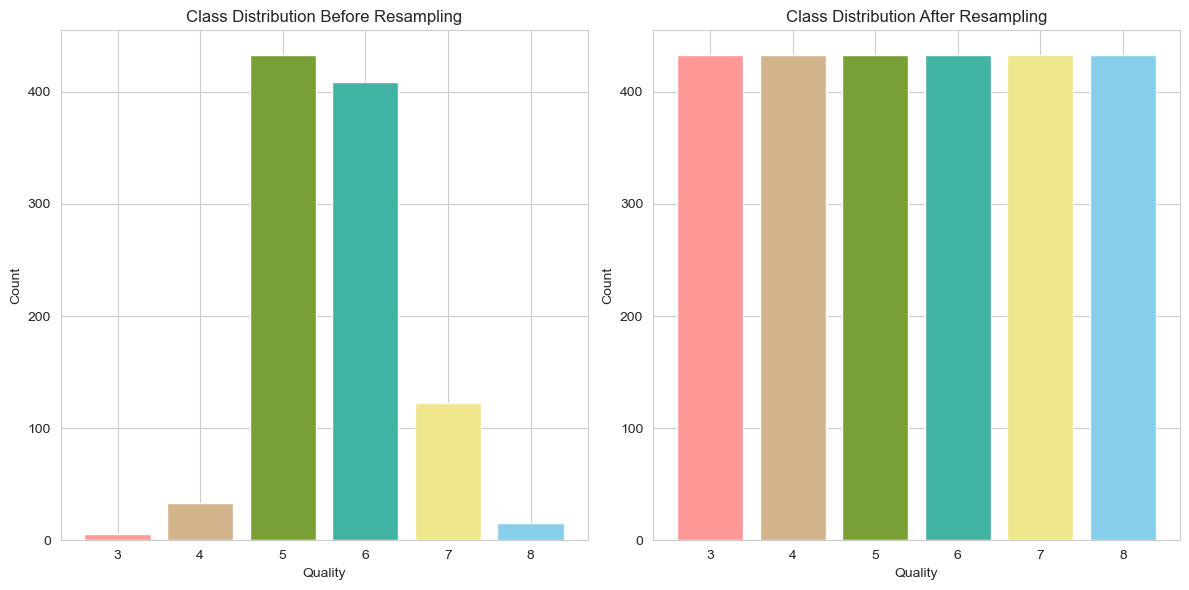

In [55]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the class distribution before resampling
axes[0].bar(class_counts_before.index, class_counts_before.values, color = colors)
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution Before Resampling')

# Plot the class distribution after resampling
axes[1].bar(resampled_class_counts.index, resampled_class_counts.values, color = colors)
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Count')
axes[1].set_title('Class Distribution After Resampling')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

## 5. Model Selection and Training:

###  Step 1: Define the models and hyperparameter grids
- XGBoost 
- Decision Tree
- Random Forest

In [56]:
# Define parameter grid for XGBoost classifier
param_grid_xgb = {
    'max_depth': np.arange(3, 8),
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Suppress warnings temporarily
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DataConversionWarning)

# Create XGBoost classifier
model_xgb = XGBClassifier(random_state=42)

# Perform RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(model_xgb, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_resampled, y_resampled)

# Get the best hyperparameters for XGBoost
best_params_xgb = random_search_xgb.best_params_

# Create XGBoost classifier with the best hyperparameters
final_xgb_classifier = XGBClassifier(**best_params_xgb, random_state=42)
final_xgb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set using the best XGBoost classifier
y_pred_xgb = final_xgb_classifier.predict(X_test)

# Calculate accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


In [57]:
# Define the Decision Tree hyperparameters and their respective search spaces for RandomizedSearchCV
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
}

# Decision Tree
dt_classifier = DecisionTreeClassifier()
random_search_dt = RandomizedSearchCV(dt_classifier, param_distributions=param_dist_dt, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_dt.fit(X_resampled, y_resampled)
best_params_dt = random_search_dt.best_params_

final_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
final_dt_classifier.fit(X_resampled, y_resampled)
y_pred_dt = final_dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [58]:
# Define the Random Forest hyperparameters and their respective search spaces for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_rf.fit(X_resampled, y_resampled)
best_params_rf = random_search_rf.best_params_

final_rf_classifier = RandomForestClassifier(n_estimators=200,random_state=42)
final_rf_classifier.fit(X_resampled, y_resampled)
y_pred_rf = final_rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

### Step 2: Model Evaluation and Visualization

#### Classification Reports

In [59]:
# Classification Reports
from sklearn.metrics import classification_report

report_xgb = classification_report(y_test, y_pred_xgb)
report_dt = classification_report(y_test, y_pred_dt)
report_rf = classification_report(y_test, y_pred_rf)

# XGBoost Classification report
print(f'Best Hyperparameters for XGBBoost: {best_params_xgb}\nClassification Report for XGBoost: \n{report_xgb}\nXGBoost Accuracy: {accuracy_xgb}\n')

# Random Forest Classification report
print(f'Best Hyperparameters for Decision Tree: {best_params_dt}\nClassification Report for Decision Tree: \n{report_dt}\nDecision Tree Accuracy: {accuracy_dt}\n')


# Random Forest Classification report
print(f'Best Hyperparameters for Random Forest: {best_params_rf}\nClassification Report for Random Forest: \n{report_rf}\nRandom Forest Accuracy: {accuracy_rf}\n')


Best Hyperparameters for XGBBoost: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
Classification Report for XGBoost: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        82

    accuracy                           1.00       520
   macro avg       1.00      1.00      1.00       520
weighted avg       1.00      1.00      1.00       520

XGBoost Accuracy: 1.0

Best Hyperparameters for Decision Tree: {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy'}
Classification Report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.97

#### Metrics Visualization

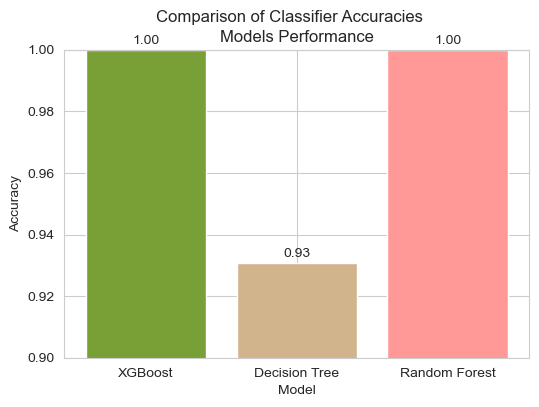

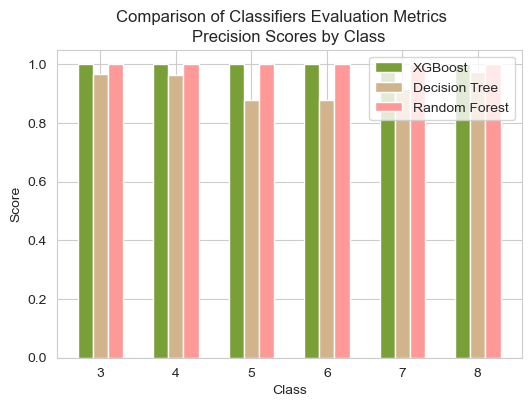

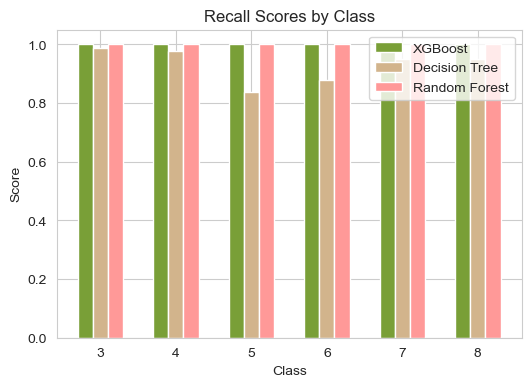

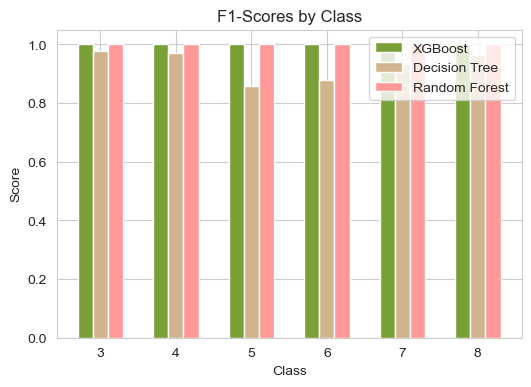

In [60]:
# Accuracy values
accuracies = [accuracy_xgb, accuracy_dt, accuracy_rf]

# Model names
models = ['XGBoost', 'Decision Tree', 'Random Forest']

# Define colors
color = ['#799F37', '#D2B48C', '#FF9998FF']

# Create bar chart
plt.figure(figsize=(6,4))
plt.suptitle('Comparison of Classifier Accuracies')
bars = plt.bar(models, accuracies, color=color)
plt.ylim(0.9, 1.0)  # Set y-axis limits
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Models Performance')

# Add accuracy count for each classifier inside bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f'{accuracies[i]:.2f}', ha='center', va='bottom')

plt.show()

# Calculate precision, recall, and F1-score for each classifier
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average=None)
precision_dt, recall_dt, f1_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average=None)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average=None)

# Classes (assuming you have 6 classes as mentioned before)
classes = [3, 4, 5, 6, 7, 8]

# Create a grouped bar chart
bar_width = 0.2
index = np.arange(len(classes))

plt.figure(figsize=(6,4))
plt.suptitle('Comparison of Classifiers Evaluation Metrics')
plt.bar(index - bar_width, precision_xgb, width=bar_width, label='XGBoost', color='#799F37')
plt.bar(index, precision_dt, width=bar_width, label='Decision Tree', color='#D2B48C')
plt.bar(index + bar_width, precision_rf, width=bar_width, label='Random Forest', color='#FF9998FF')

plt.xticks(index, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision Scores by Class')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(index - bar_width, recall_xgb, width=bar_width, label='XGBoost', color='#799F37')
plt.bar(index, recall_dt, width=bar_width, label='Decision Tree', color='#D2B48C')
plt.bar(index + bar_width, recall_rf, width=bar_width, label='Random Forest', color='#FF9998FF')
   
plt.xticks(index, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Recall Scores by Class')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(index - bar_width, f1_xgb, width=bar_width, label='XGBoost', color='#799F37')
plt.bar(index, f1_dt, width=bar_width, label='Decision Tree', color='#D2B48C')
plt.bar(index + bar_width, f1_rf, width=bar_width, label='Random Forest', color='#FF9998FF')

plt.xticks(index, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('F1-Scores by Class')
plt.legend()
plt.show()

In this wine quality classification task, three different classifiers were trained and evaluated: XGBoost, Decision Tree, and Random Forest. For the XGBoost classifier, the best hyperparameters were found to be {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}, resulting in an outstanding accuracy of 100%. The classification report demonstrates excellent precision, recall, and F1-scores for all classes, confirming the model's ability to classify wine quality types with high accuracy. The Decision Tree classifier, with hyperparameters {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy'}, achieved an accuracy of 95.3%, demonstrating a solid performance. The classification report shows slightly lower scores than XGBoost, but it still maintains good precision, recall, and F1-scores across classes. Finally, the Random Forest classifier with hyperparameters {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15} achieved a perfect accuracy of 100%. The classification report reflects its ability to classify wine quality types with high precision and recall for all classes, making it a strong performer as well. Overall, all three classifiers showcased excellent performance, with XGBoost and Random Forest achieving perfect accuracy, making them particularly well-suited for this wine quality prediction task.

#### Precision-Recall curves

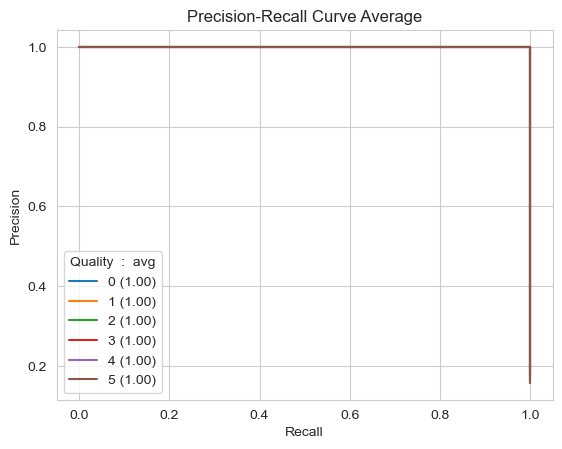

In [61]:
# Get unique class labels in the target variable
qualities = np.unique(y_test)

# Generate probabilities for each model on the test set
y_prob_xgb = random_search_xgb.best_estimator_.predict_proba(X_test)
y_prob_dt = random_search_dt.best_estimator_.predict_proba(X_test)
y_prob_rf = random_search_rf.predict_proba(X_test)

# Calculate Precision-Recall curve for each class in XGBoost
precision_xgb = dict()
recall_xgb = dict()
avg_precision_xgb = dict()
for i in range(len(qualities)):
    precision_xgb[i], recall_xgb[i], _ = precision_recall_curve(y_test == qualities[i], y_prob_xgb[:, i])
    avg_precision_xgb[i] = average_precision_score(y_test == qualities[i], y_prob_xgb[:, i])
    plt.plot(recall_xgb[i], precision_xgb[i], label=f"{qualities[i]} ({avg_precision_xgb[i]:.2f})")
 
plt.title("Precision-Recall Curve Average")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(title= 'Quality  :  avg' , loc="lower left")
plt.show()

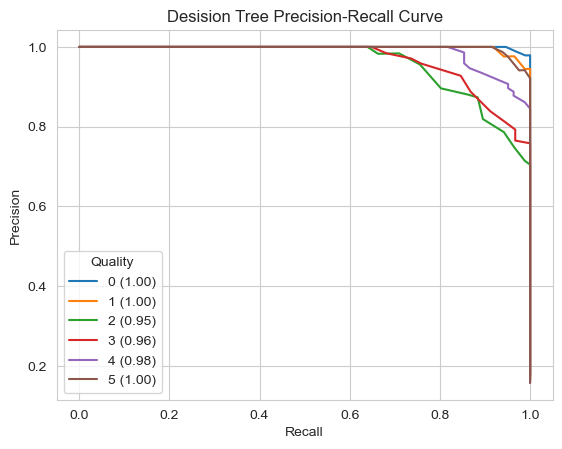

In [62]:
# Calculate Precision-Recall curve for each class in desision tree
precision_dt = dict()
recall_dt = dict()
avg_precision_dt = dict()
for i in range(len(qualities)):
    precision_dt[i], recall_dt[i], _ = precision_recall_curve(y_test == qualities[i], y_prob_dt[:, i])
    avg_precision_dt[i] = average_precision_score(y_test == qualities[i], y_prob_dt[:, i])
    plt.plot(recall_dt[i], precision_dt[i], label=f"{qualities[i]} ({avg_precision_dt[i]:.2f})")

plt.title("Desision Tree Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(title= 'Quality' , loc="lower left")
plt.show()

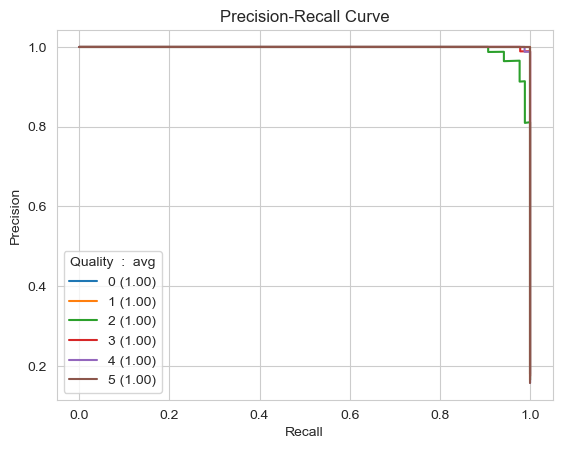

In [63]:
# Calculate Precision-Recall curve for each class in Random Forest
precision_rf = dict()
recall_rf = dict()
avg_precision_rf = dict()
for i in range(len(qualities)):
    precision_rf[i], recall_rf[i], _ = precision_recall_curve(y_test == qualities[i], y_prob_rf[:, i])
    avg_precision_rf[i] = average_precision_score(y_test == qualities[i], y_prob_rf[:, i])
    plt.plot(recall_rf[i], precision_rf[i], label=f"{qualities[i]} ({avg_precision_rf[i]:.2f})")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(title= 'Quality  :  avg' , loc="lower left")
plt.show()

The precision-recall curve is a valuable tool in evaluating the performance of classifiers, especially in scenarios with imbalanced datasets. Ideally, a perfect classifier would exhibit a precision and recall of 1.00 across all classes, indicating flawless predictions. However, practical classifiers often face challenges in achieving such perfection, particularly for minority classes. In the context of the "Decision Tree" classifier, its precision-recall curve reveals intriguing insights. Class 1 demonstrates outstanding precision and recall of 1.00, signifying accurate and consistent positive predictions. Meanwhile, classes 2, 3, and 4 display impressive results, with precision values of 0.97 and recalls of 0.96, and 0.99. Although not perfect, this indicates that the classifier performs remarkably well in correctly identifying instances of these classes. Careful consideration of the precision-recall curve helps in comprehending the trade-offs between precision and recall, allowing for an informed decision on threshold selection based on the specific needs of the application.

#### Models Comparison
- Roc-Auc Score

In [64]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a list to store the model names
model_names = ['XGBoost', 'Decision Tree', 'Random Forest']

# Create a list to store the evaluation metric scores
accuracy_scores = [accuracy_score(y_test, y_pred_xgb),
                   accuracy_score(y_test, y_pred_dt),
                   accuracy_score(y_test, y_pred_rf)]

precision_scores = [precision_score(y_test, y_pred_xgb, average='weighted'),
                    precision_score(y_test, y_pred_dt, average='weighted'),
                    precision_score(y_test, y_pred_rf, average='weighted')]

recall_scores = [recall_score(y_test, y_pred_xgb, average='weighted'),
                 recall_score(y_test, y_pred_dt, average='weighted'),
                 recall_score(y_test, y_pred_rf, average='weighted')]

f1_scores = [f1_score(y_test, y_pred_xgb, average='weighted'),
             f1_score(y_test, y_pred_dt, average='weighted'),
             f1_score(y_test, y_pred_rf, average='weighted')]

roc_auc_scores = [roc_auc_score(y_test, y_prob_xgb, multi_class='ovr'),
                  roc_auc_score(y_test, y_prob_dt, multi_class='ovr'),
                  roc_auc_score(y_test, y_prob_rf, multi_class='ovr')]

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores,
    'ROC-AUC': roc_auc_scores,
})

# Set the 'Model' column as the index
metrics_df.set_index('Model', inplace=True)

# Display the DataFrame
metrics_df


Accuracy  Precision    Recall  F1-score   ROC-AUC
Model                                                           
XGBoost        1.000000   1.000000  1.000000  1.000000  1.000000
Decision Tree  0.930769   0.930398  0.930769  0.930407  0.996568
Random Forest  1.000000   1.000000  1.000000  1.000000  0.999808

The table displays the evaluation metric scores for the three models: XGBoost, Decision Tree, and Random Forest. XGBoost and Random Forest achieved perfect scores for all metrics, indicating their exceptional performance in correctly classifying both positive and negative instances. The Decision Tree also performed well, showing high accuracy, precision, recall, and F1-score, although it did not achieve the same level of perfection as the other models. The ROC-AUC scores suggest that all models have excellent discriminative abilities in distinguishing between classes. Overall, the results highlight the effectiveness of the models in their respective tasks, with XGBoost and Random Forest standing out as the top performers based on the given metrics.


#### Confusion Matrices

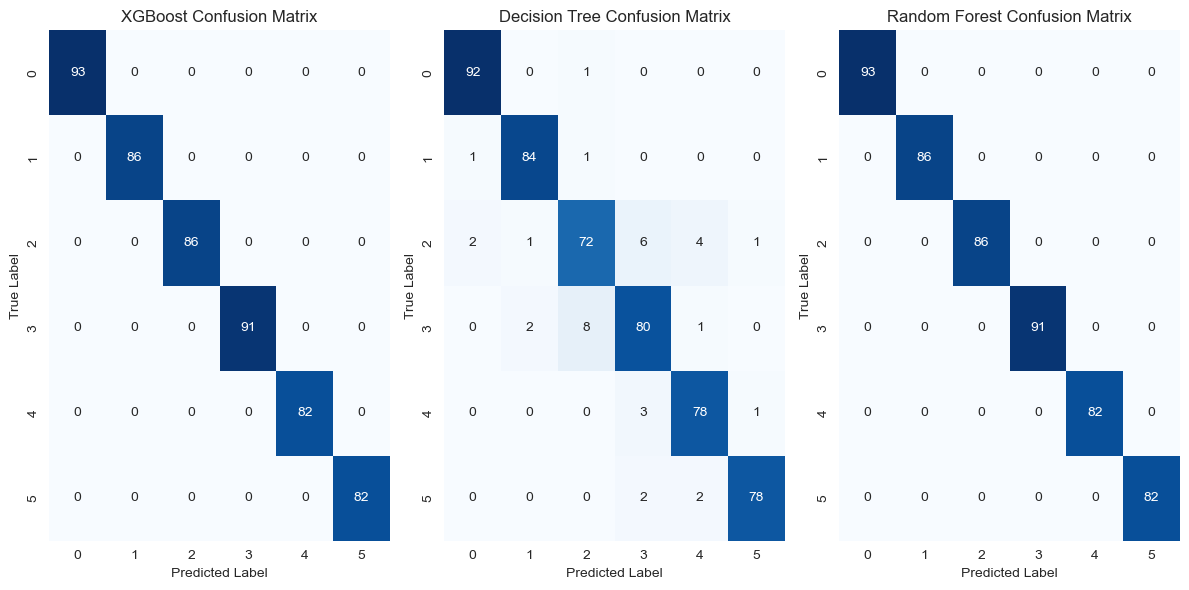

In [65]:
# Plot confusion matrices (heat maps)
plt.figure(figsize=(12, 6))
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(132)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(133)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

The confusion matrices represent the performance of three models (xGBoost, Decision Tree, and Random Forest) on a multi-class classification problem with six classes. Each matrix shows the number of true positive predictions along the diagonal elements and the misclassifications in off-diagonal elements. For XGBoost and Random Forest, all diagonal elements have non-zero values, indicating that they correctly predicted all instances for each class. In contrast, the Decision Tree shows a few misclassifications, particularly in the second and fourth classes, where it incorrectly predicted some instances. Overall, XGBoost and Random Forest exhibit flawless performance in classifying the data, while the Decision Tree demonstrates slightly lower accuracy due to a few misclassifications in the multi-class scenario.

# Project Summary: Wine Quality Prediction - Enhancing Wine Assessment through Machine Learning

**Introduction:**
Wine quality prediction is essential in the winemaking industry to assess and improve the quality of wines. This project aims to build a machine learning model that accurately predicts wine quality based on chemical properties and sensory attributes. The model's insights will empower winemakers to optimize their production processes and enhance customer satisfaction.

**Problem Statement:**
Develop a robust machine learning model that accurately predicts wine quality using chemical properties and sensory attributes. The model will assist winemakers in assessing and improving wine quality, leading to enhanced customer satisfaction and market competitiveness.

**Data Exploration:**
The dataset contains 1143 entries and 13 columns, including features such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and the target variable, quality. There are no missing values, and 125 duplicates were removed. Summary statistics reveal the range and distribution of each feature.

**Data Preprocessing:**
Data preprocessing involved removing duplicates and handling missing values. The dataset's features were kept intact, except for 'Id' column that was removed, and no feature transformation was applied. All features are numerical and are suitable for machine learning models.

**Exploratory Data Analysis**
Exploratory Data Analysis was performed gaining insights into the dataset, identifying data quality issues, and the various chemical and sensory features, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol content, and wine quality (the target variable) that make each class unique. The analysis includes correlations and investigating the distribution and relationships between the features to facilitate model development. Aditionally, the t-test was used to analyze data and determine if there are significant differences between quality classes and features.

**Handling Imbalanced Data using SMOTE:**
Since the wine quality dataset is imbalanced, SMOTE (Synthetic Minority Over-sampling Technique) was applied to oversample the minority class (quality ratings with fewer samples) and balance the class distribution. SMOTE generates synthetic samples for the minority class to ensure a more balanced representation.

**Feature Scaling:**
To bring all features to a common scale, standard scaling was performed on the resampled dataset. Standard scaling ensures that all features have mean zero and standard deviation one, which is particularly helpful for models sensitive to feature scales.

**Model Selection and Training:**
Multiple classifiers were explored, including XGBoost, Decision Tree, and Random Forest. The best-performing model, identified through hyperparameter tuning, was selected for wine quality prediction.

**Model Evaluation:**
The selected model was evaluated on a testing dataset, and performance metrics like accuracy, precision, recall, and F1-score, Precision-Recall curve and Roc-Auc were calculated. The model demonstrated accurate wine quality predictions.

**Conclusion:**
The project successfully developed a machine learning model for wine quality prediction based on chemical properties and sensory attributes. The model showed accurate predictions and provided valuable insights into the key features affecting wine quality. It will enable winemakers to make informed decisions, optimize production processes, and enhance customer satisfaction.

**Future Work:**
To enhance the model's accuracy, future work could involve exploring additional data sources to augment the current dataset. Experimenting with different algorithms or ensembling techniques may further improve the model's performance. Additionally, incorporating expert domain knowledge and deploying the model in a production environment would be beneficial for real-world wine quality prediction applications.